<a href="https://colab.research.google.com/github/Sneha-s-kumarr/ICTAK_DSA_FinalProject/blob/main/Crop_Yield_prediction_regression_task_feature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.5f}'.format)

In [4]:
# Loading the dataset
file_url= 'https://raw.githubusercontent.com/ManjuVijayakumar/ICTAK_DSA_FinalProject/refs/heads/main/crop_yield_main.csv'
yield_df = pd.read_csv(file_url, index_col= 'Unnamed: 0')

# First 5 rows
yield_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
0,Arecanut,1997,Whole Year,Assam,73814.00000,56708,2372.20000,7024878.38000,22882.34000,0.79609,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
1,Arhar/Tur,1997,Kharif,Assam,6637.00000,4685,2372.20000,631643.29000,2057.47000,0.71043,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
2,Castor seed,1997,Kharif,Assam,796.00000,22,2372.20000,75755.32000,246.76000,0.23833,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
3,Coconut,1997,Whole Year,Assam,19656.00000,126905000,2372.20000,1870661.52000,6093.36000,5238.05174,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
4,Cotton(lint),1997,Kharif,Assam,1739.00000,794,2372.20000,165500.63000,539.09000,0.42091,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000


In [ ]:
# Last 5 rows
yield_df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
19684,Small millets,1998,Kharif,Nagaland,4000.00000,2000,2225.40000,395200.00000,1160.00000,0.50000,India,red,19.37000,19.44000,22.98000,14.60000,14.53000,12.37000,22.76000,22.94000,16.07000,22.30000,22.98000,18.51000,22.77000,18.63000,23.24000,19.27000,13.45000,28.10000,31.60000,136.40000,164.60000,352.20000,297.60000,480.60000,367.30000,222.30000,97.90000,46.50000,0.30000,59.70000,653.20000,1367.90000,144.70000
19685,Wheat,1998,Rabi,Nagaland,1000.00000,3000,2225.40000,98800.00000,290.00000,3.00000,India,red,19.37000,19.44000,22.98000,14.60000,14.53000,12.37000,22.76000,22.94000,16.07000,22.30000,22.98000,18.51000,22.77000,18.63000,23.24000,19.27000,13.45000,28.10000,31.60000,136.40000,164.60000,352.20000,297.60000,480.60000,367.30000,222.30000,97.90000,46.50000,0.30000,59.70000,653.20000,1367.90000,144.70000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.00000,440900,1295.90000,29586735.11000,96373.73000,1.28500,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.00000,5488,1295.90000,26242746.82000,85481.26000,0.01667,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.00000,392160,1295.90000,22778368.48000,74196.64000,1.26182,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000


In [ ]:
# Shape of the dataset
print('Dataset has {} row and {} columns'.format(yield_df.shape[0], yield_df.shape[1]))

Dataset has 19689 row and 45 columns


In [ ]:
# Dataset Information
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19689 entries, 0 to 19688
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crop               19689 non-null  object 
 1   Crop_Year          19689 non-null  int64  
 2   Season             19689 non-null  object 
 3   State              19689 non-null  object 
 4   Area               19689 non-null  float64
 5   Production         19689 non-null  int64  
 6   Annual_Rainfall    19689 non-null  float64
 7   Fertilizer         19689 non-null  float64
 8   Pesticide          19689 non-null  float64
 9   Yield              19689 non-null  float64
 10  Country            19689 non-null  object 
 11  Soil_type          19689 non-null  object 
 12  Annual_mean_temp   18661 non-null  float64
 13  Apr_temp           18661 non-null  float64
 14  Aug_temp           18661 non-null  float64
 15  Dec_temp           18661 non-null  float64
 16  Feb_temp           18661 no

In [ ]:
print('No of numeric columns : {} '.format(len(yield_df.select_dtypes(include = np.number).columns)))
print('No of categorical columns : {} '.format(len(yield_df.select_dtypes(include= 'object').columns)))


No of numeric columns : 40 
No of categorical columns : 5 


In [ ]:
# Missing values
print('Total no. of missing values : {}'.format(yield_df.isnull().sum().sum()))

Total no. of missing values : 61732


In [ ]:
# yield_df.columns

### Bookmark1-Manju

**Analyzing Features: Crop, Crop_Year, Season, State, Area, Production, Annual_Rainfall, Fertilizer, Pesticide, Yield, Country, Soil_type**

In [ ]:
data= yield_df[['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Country',
       'Soil_type']]
data.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Country',
       'Soil_type'],
      dtype='object')

In [ ]:
# Missing Values
data.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
# Duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
# Statistical Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.00000,2009.12758,6.49810,1997.00000,2004.00000,2010.00000,2015.00000,2020.00000
Area,19689.00000,179926.57031,732828.67589,0.50000,1390.00000,9317.00000,75112.00000,50808100.00000
Production,19689.00000,16435941.27310,263056839.81257,0.00000,1393.00000,13804.00000,122718.00000,6326000000.00000
Annual_Rainfall,19689.00000,2116.54624,1436.68884,274.70000,1194.70000,1633.00000,2468.30000,7155.30000
Fertilizer,19689.00000,24103312.44881,94946004.48253,54.17000,188014.62000,1234957.44000,10003847.20000,4835406877.00000
Pesticide,19689.00000,48848.35339,213287.35486,0.09000,356.70000,2421.90000,20041.70000,15750511.00000
Yield,19689.00000,79.95401,878.30619,0.00000,0.60000,1.03000,2.38889,21105.00000


In [ ]:
data.describe(include= 'object').T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432
Country,19689,1,India,19689
Soil_type,19689,7,alluvial,7437


**Insights**

* Dataset has 19689 row and 45 columns
* Categorical: 5 and Numerical: 40
* Total no. of missing values : 61732
* Statistical summary of first 12 columns shows presence of positive skewness in Area, Production, Annual_Rainfall, Fertilizer, Pesticide and Yield



#### **Univariate Analysis**
It's the study of single variable in dataset. The underlying distribution of variable can be analyzed.

In [ ]:
# Categorical columns
cat_cols= data.select_dtypes(include= 'object').columns

# Numerical columns
num_cols= data.select_dtypes(include= np.number).columns

In [ ]:
# Categorical column analysis
for feature in cat_cols:
  print(data[feature].value_counts(),'\n')

Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garli

In [ ]:
# Country has unique value. This unique feature will be irrelevant to the model's predictive performance and can be ignored/dropped
# Country

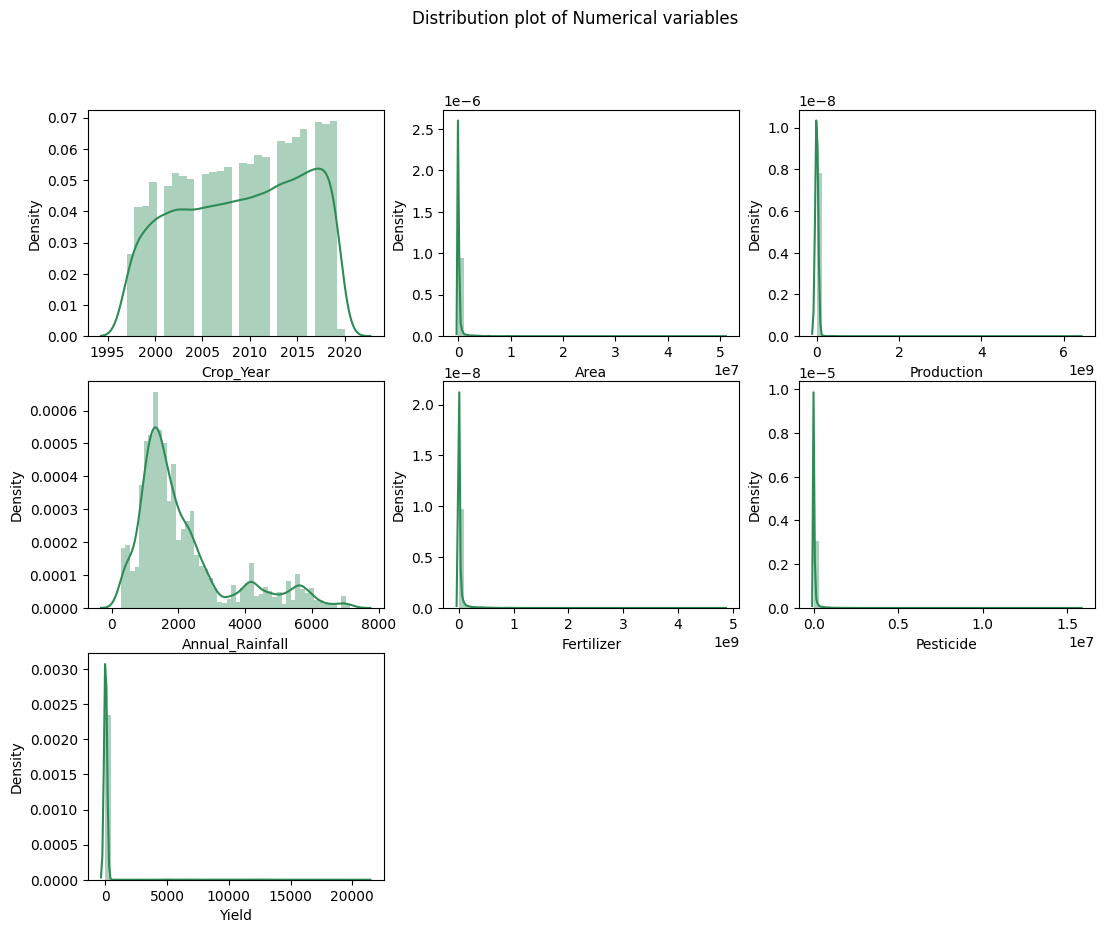

In [ ]:
fig, ax= plt.subplots(3, 3, figsize= (13, 10))
ax= ax.flatten()

for i, c in enumerate(data[num_cols]):
  sns.distplot(x= data[c], ax= ax[i], axlabel= c, color= 'seagreen')
plt.delaxes(ax[7])
plt.delaxes(ax[8])
plt.suptitle('Distribution plot of Numerical variables')
plt.show()

In [ ]:
for feat in data[num_cols]:
  print(feat,'',data[feat].skew())

Crop_Year  -0.16265562121556904
Area  21.858217797355426
Production  19.299193411606723
Annual_Rainfall  1.4591116050304829
Fertilizer  13.412598810025766
Pesticide  25.635746086843607
Yield  12.785264685628691


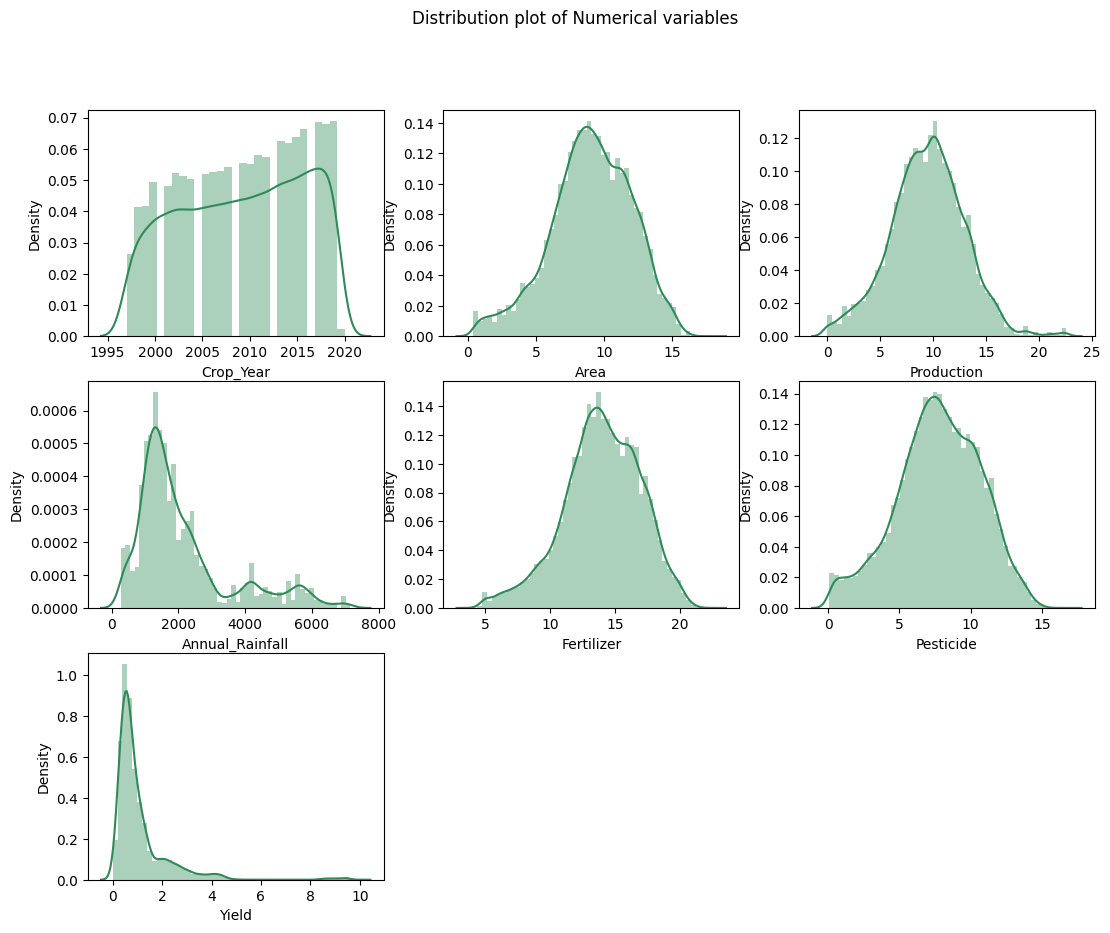

In [ ]:
fig, ax= plt.subplots(3, 3, figsize= (13, 10))
ax= ax.flatten()

for i, c in enumerate(data[num_cols]):
  if c in ['Crop_Year', 'Annual_Rainfall']:
    sns.distplot(x= data[c], ax= ax[i], axlabel= c, color= 'seagreen')
  else:
    sns.distplot(x= np.log1p(data[c]), ax= ax[i], axlabel= c, color= 'seagreen')
plt.delaxes(ax[7])
plt.delaxes(ax[8])
plt.suptitle('Distribution plot of Numerical variables')
plt.show()

In [ ]:
cat_cols

Index(['Crop', 'Season', 'State', 'Country', 'Soil_type'], dtype='object')

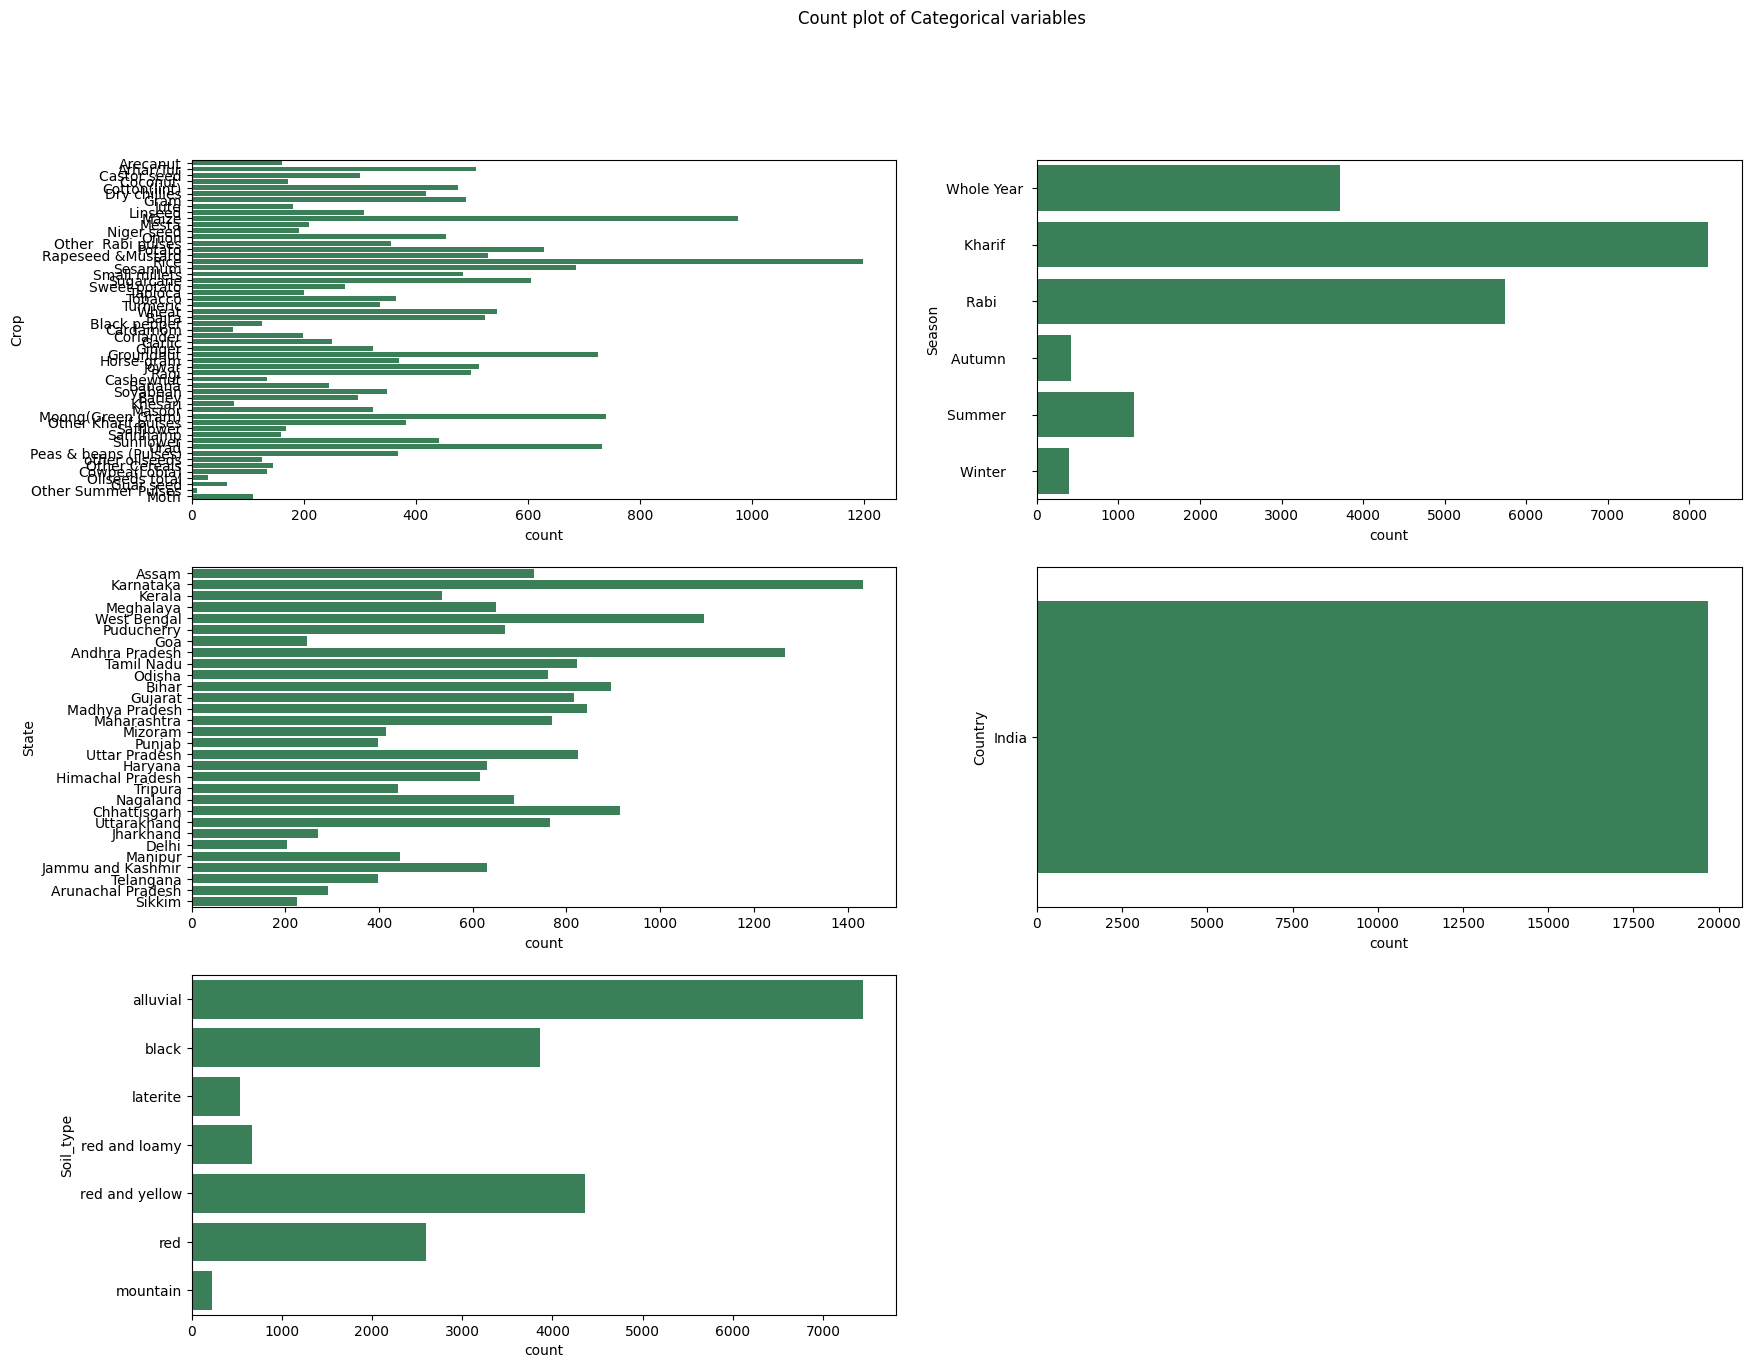

In [ ]:
fig, ax= plt.subplots(3, 2, figsize= (20, 15))
ax= ax.flatten()

for i, c in enumerate(data[cat_cols]):
  sns.countplot(y= data[c], ax= ax[i], color= 'seagreen')
  # ax[i].tick_params(axis='x', labelrotation=90)
plt.delaxes(ax[5])
plt.suptitle('Count plot of Categorical variables')

plt.show()

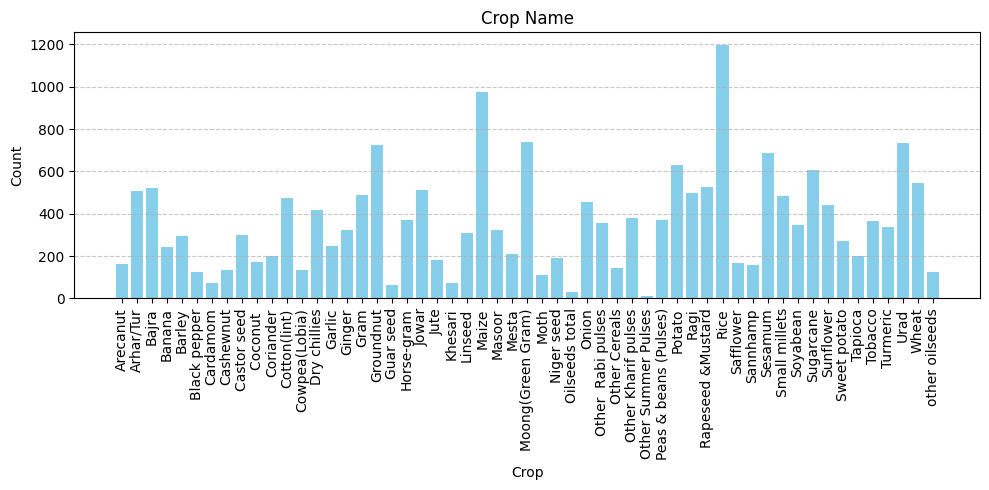

In [ ]:
# Count details for each crop. Top 10

crop_counts= yield_df.Crop.value_counts().sort_index()

plt.figure(figsize= (10, 5))
plt.bar(crop_counts.index, crop_counts.values, color= 'skyblue')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.title('Crop Name')
plt.xticks(rotation= 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Insights**

*   Country has unique value. This unique feature will be irrelevant to the model's predictive performance and can be ignored/dropped
*   Distribution plot shows features Area, Production, Fertilizer, Pesticide and Yield are highly positively skewed.
*   Log transformation applied to features that are highly skewed. Log-transforming it helps stabilize variance, reduce skewness, and makes relationships with predictors more linear, which is better for visualization, correlation and modeling.





#### **Bivariate Analysis**
Its the statistical method to analyze the relationship between two features.

In [ ]:
cat_cols

Index(['Crop', 'Season', 'State', 'Country', 'Soil_type'], dtype='object')

In [ ]:
num_cols

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield'],
      dtype='object')

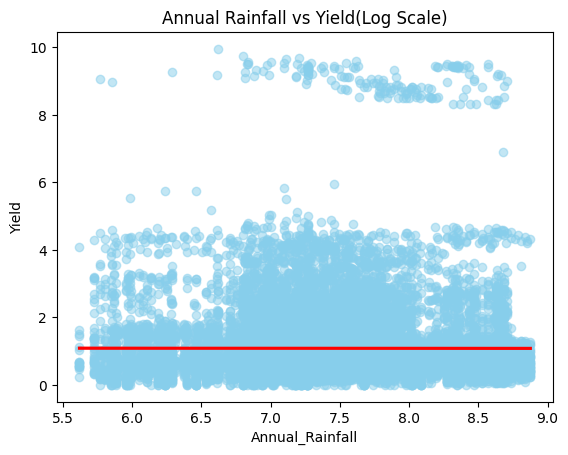

In [ ]:
# Annual Rainfall vs Yield
sns.regplot (
    x= np.log1p(data.Annual_Rainfall),
    y= np.log1p(data.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Annual Rainfall vs Yield(Log Scale)')
plt.show()

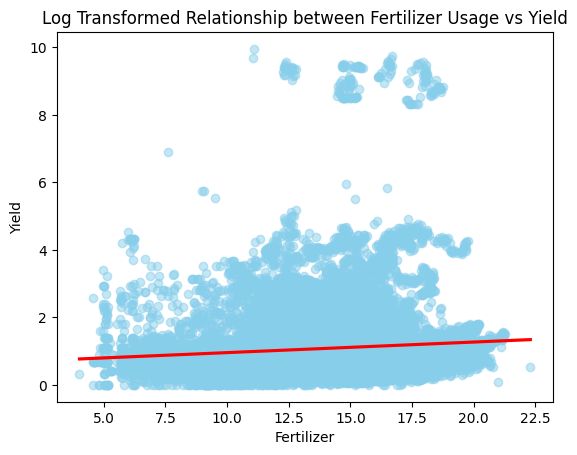

In [ ]:
# Fertilizer vs Yield
sns.regplot (
    x= np.log1p(data.Fertilizer),
    y= np.log1p(data.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Log Transformed Relationship between Fertilizer Usage vs Yield')
plt.show()

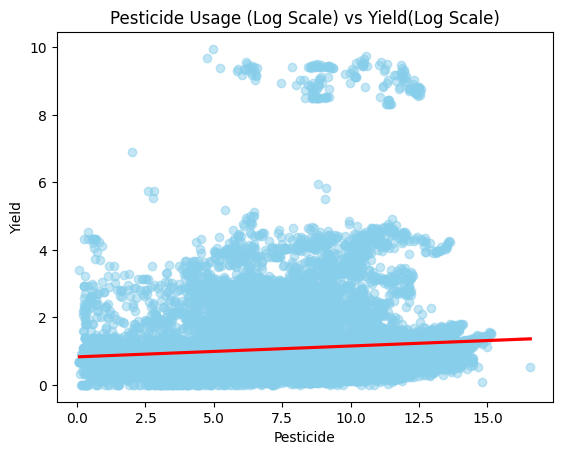

In [ ]:
sns.regplot (
    x= np.log1p(data.Pesticide),
    y= np.log1p(data.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Pesticide Usage (Log Scale) vs Yield(Log Scale)')
plt.show()

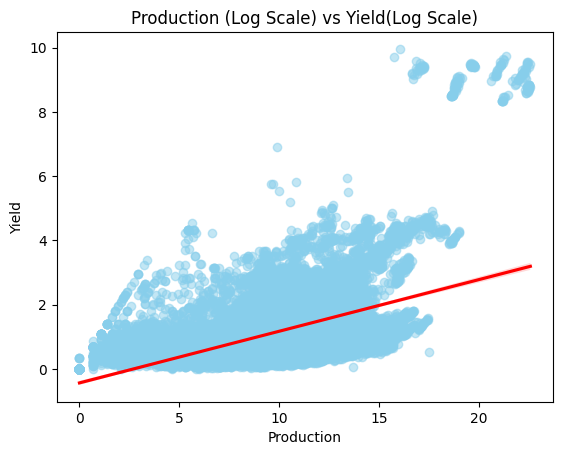

In [ ]:
sns.regplot (
    x= np.log1p(data.Production),
    y= np.log1p(data.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Production (Log Scale) vs Yield(Log Scale)')
plt.show()

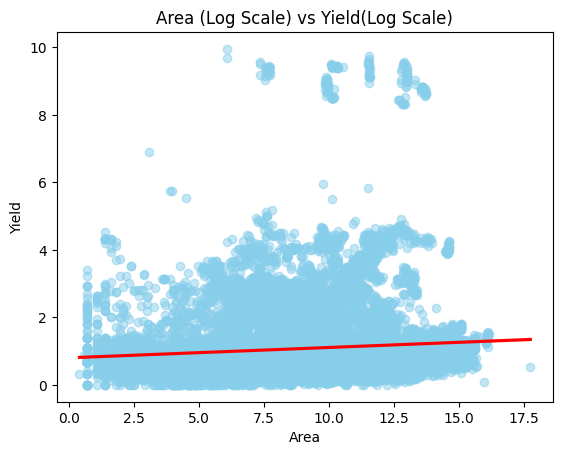

In [ ]:
sns.regplot (
    x= np.log1p(data.Area),
    y= np.log1p(data.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Area (Log Scale) vs Yield(Log Scale)')
plt.show()

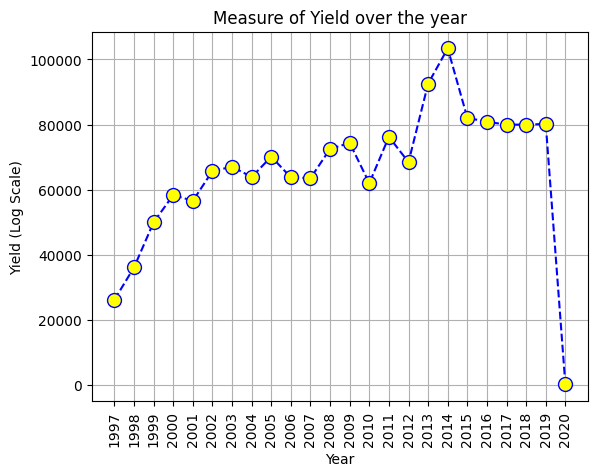

In [ ]:
# Yield trend over the year

df_year= data.groupby('Crop_Year', as_index= False)['Yield'].sum()

plt.plot(df_year['Crop_Year'].astype(str),df_year['Yield'],color='blue', linestyle='dashed',
         marker='o',markersize=10, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield (Log Scale)')
plt.title('Measure of Yield over the year')
plt.xticks(rotation= 90)
plt.grid()
plt.show()

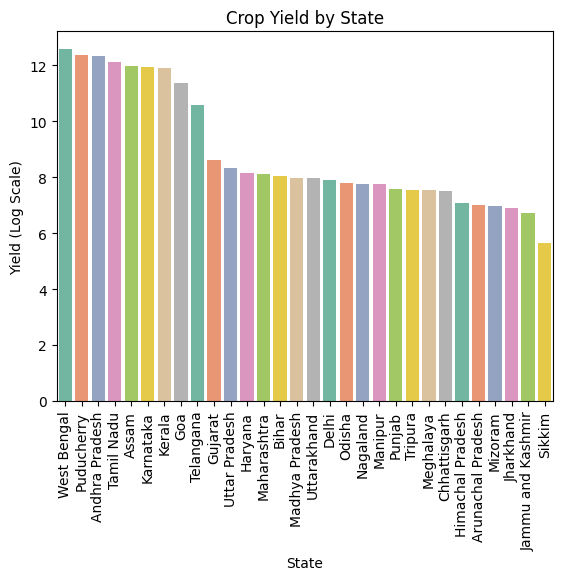

In [ ]:
df_state= yield_df.groupby('State', as_index= False)['Yield'].sum().sort_values(by= 'Yield', ascending= False)

sns.barplot(x= df_state.State, y= np.log1p(df_state.Yield), palette= 'Set2')
plt.xticks(rotation = 90)
plt.ylabel('Yield (Log Scale)')
plt.title('Crop Yield by State')
plt.show()

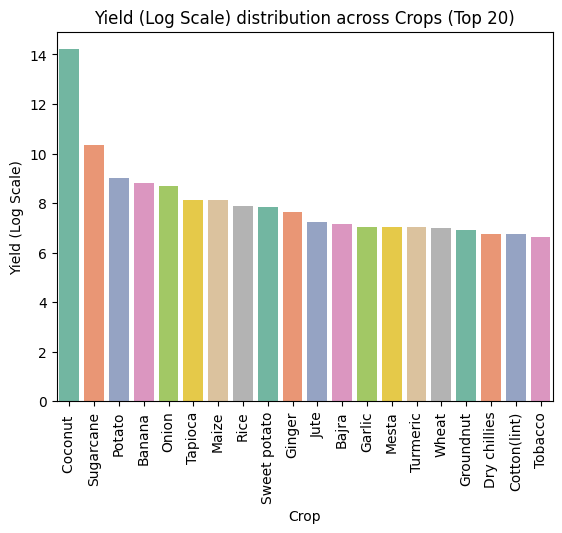

In [ ]:
df_crop= data.groupby('Crop', as_index= False)['Yield'].sum().sort_values(by= 'Yield', ascending= False).head(20)

# plt.figure(figsize= (15, 10))
sns.barplot(x= df_crop.Crop, y= np.log1p(df_crop.Yield), palette= 'Set2')
plt.xticks(rotation = 90)
plt.ylabel('Yield (Log Scale)')
plt.title('Yield (Log Scale) distribution across Crops (Top 20)')
plt.show()

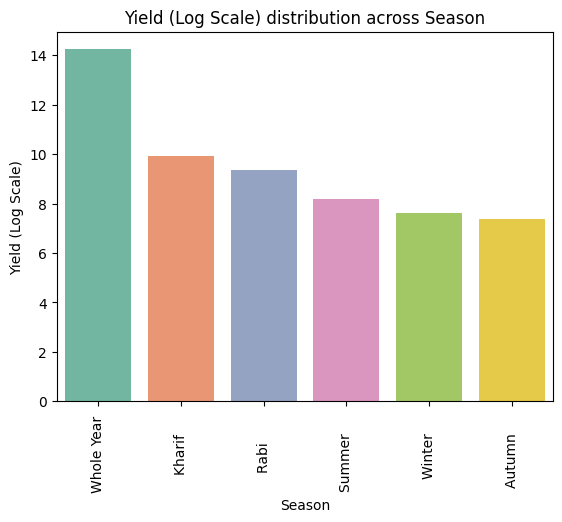

In [ ]:
df_season= data.groupby('Season', as_index= False)['Yield'].sum().sort_values(by= 'Yield', ascending= False).head(20)

# plt.figure(figsize= (15, 10))
sns.barplot(x= df_season.Season, y= np.log1p(df_season.Yield), palette= 'Set2')
plt.xticks(rotation = 90)
plt.ylabel('Yield (Log Scale)')
plt.title('Yield (Log Scale) distribution across Season')
plt.show()

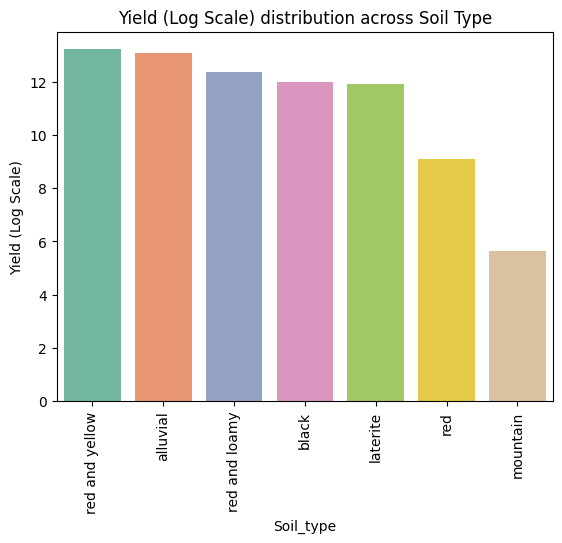

In [ ]:
df_soil= data.groupby('Soil_type', as_index= False)['Yield'].sum().sort_values(by= 'Yield', ascending= False).head(20)

# plt.figure(figsize= (15, 10))
sns.barplot(x= df_soil.Soil_type, y= np.log1p(df_soil.Yield), palette= 'Set2')
plt.xticks(rotation = 90)
plt.ylabel('Yield (Log Scale)')
plt.title('Yield (Log Scale) distribution across Soil Type')
plt.show()

**Insights**

1. The regplot between Annual Rainfall and Yield gives a nearly horizontal line which means there is no meaninful linear relationship between the two variables. The scatter points are widely dispersed, suggesting the features does not explain variations in yield.

2. There is a slight positive slope when analyzing features like Pesticide, Area and Fertilizer. This indicates as Variale X increases, Variable Y also tends to increase.

3. The regplot between Production and Yield shows a moderatately strong positive correlation (r = 0.57)

4. Year 2014 shows highest yield.

5. West Bengal records the highest overall yield among all States

6. Coconut has the highest yield among all crops in the dataset followed by Sugarcane.


In [ ]:
data[num_cols].corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.00000,-0.03569,0.00337,-0.12994,0.01117,-0.00466,0.00254
Area,-0.03569,1.00000,0.03744,0.04938,0.97326,0.97348,0.00186
Production,0.00337,0.03744,1.00000,0.02319,0.03980,0.03517,0.57081
Annual_Rainfall,-0.12994,0.04938,0.02319,1.00000,0.04474,0.03849,0.02704
Fertilizer,0.01117,0.97326,0.03980,0.04474,1.00000,0.95499,0.00286
Pesticide,-0.00466,0.97348,0.03517,0.03849,0.95499,1.00000,0.00178
Yield,0.00254,0.00186,0.57081,0.02704,0.00286,0.00178,1.00000


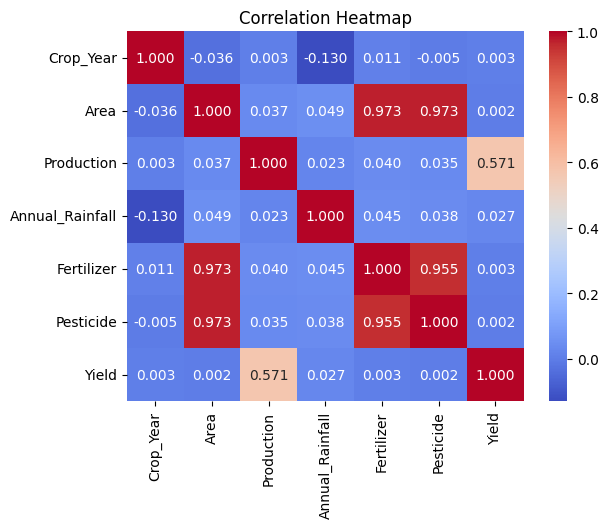

In [ ]:
sns.heatmap(data[num_cols].corr(), annot= True, cmap= 'coolwarm', fmt= '.3f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
cat_cols
# Label encoding - ordinal
# One hot encoding - less cardinality - dummy variable
print(data['Crop'].nunique())
print(data['Season'].nunique())
print(data['Soil_type'].nunique())

print(data['State'].nunique())

55
6
7
30


#### **Insights**

1. The regplot between Annual Rainfall and Yield gives a nearly horizontal line which means there is no meaninful linear relationship between the two variables. The scatter points are widely dispersed, suggesting the features does not explain variations in yield.

2. There is a slight positive slope when analyzing features like Pesticide, Area and Fertilizer. This indicates as Variable X increases, Variable Y also tends to increase.

3. The regplot between Production and Yield shows a moderatately strong positive correlation (r = 0.57)

4. Year 2014 shows highest yield.

5. West Bengal records the highest overall yield among all States

6. Coconut has the highest yield among all crops in the dataset followed by Sugarcane.


---



*  The heatmap of numerical variables shows a **strong positive correlation between features Pesticide and Fertilizer, Area and Pesticide, Area and Fertilizer. Can try dropping one of them while modelling** to see if there is any performance improvement.
*  The slight positive slope displayed by features Area, Pesticide and Fertilizer was just noise (r ≈ 0.002). The correlation values indicates no meaningful linear relationship.


---



Crop_Year showed almost no linear relationship with Yield (correlation = 0.003). Since the project is not time-series based and year does not causally influence yield, the feature was excluded from modeling to avoid noise and overfitting.

Country has unique value. This unique feature will be irrelevant to the model's predictive performance and can be ignored/dropped.

Feature	  Keep/Drop	Reason	Recommended Encoding <br>
Crop (55)	Target / Frequency Encoding <br>
State (30)	One-hot (tree models) or Target (linear) <br>
Season (6)		One-hot <br>
Soil Type (7)	One-hot

Target Encoding replaces each category with the mean of the target-variable (Yield) of that category <br>
**category_encoders** library


---
**Features that can be dropped:** <br>
Country<br>
Crop_Year<br>
The heatmap of numerical variables shows a **strong positive correlation between features Pesticide and Fertilizer, Area and Pesticide, Area and Fertilizer. Can try dropping one of them while modelling** to see if there is any performance improvement.


### Bookmark2-Darsana

In [ ]:
temp_cols = [
    'Annual_mean_temp','Apr_temp','Aug_temp','Dec_temp','Feb_temp',
    'Jan_temp','Jul_temp','Jun_temp','Mar_temp','May_temp','Monsoon_temp'
]

temp_df = yield_df[temp_cols]

In [ ]:
temp_df.describe()

,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp
count,18661.00000,18661.00000,18661.00000,18661.00000,18661.00000,18661.00000,18661.00000,18661.00000,18661.00000,18661.00000,18661.00000
mean,24.29205,27.22481,26.47446,18.74783,20.23466,17.85022,26.80782,28.30373,23.98926,28.86064,26.96522
std,4.65796,5.66288,3.38236,5.66398,6.30916,6.31893,3.53001,4.49245,5.88301,5.42296,3.71940
min,3.83000,2.82000,10.42000,-2.90000,-3.33000,-4.81000,10.25000,9.88000,0.12000,6.89000,10.20000
25%,23.60000,24.92000,25.46000,16.61000,17.70000,15.05000,25.48000,26.41000,22.03000,26.06000,25.80000
50%,26.01000,29.60000,27.31000,19.27000,21.34000,18.41000,27.60000,29.73000,26.03000,30.61000,28.15000
75%,26.79000,30.77000,28.56000,23.00000,25.52000,23.22000,29.00000,31.39000,28.19000,32.84000,29.21000
max,29.08000,33.02000,31.29000,26.91000,27.81000,26.78000,32.66000,35.13000,30.34000,34.79000,31.77000


#### **Univariate Analysis**

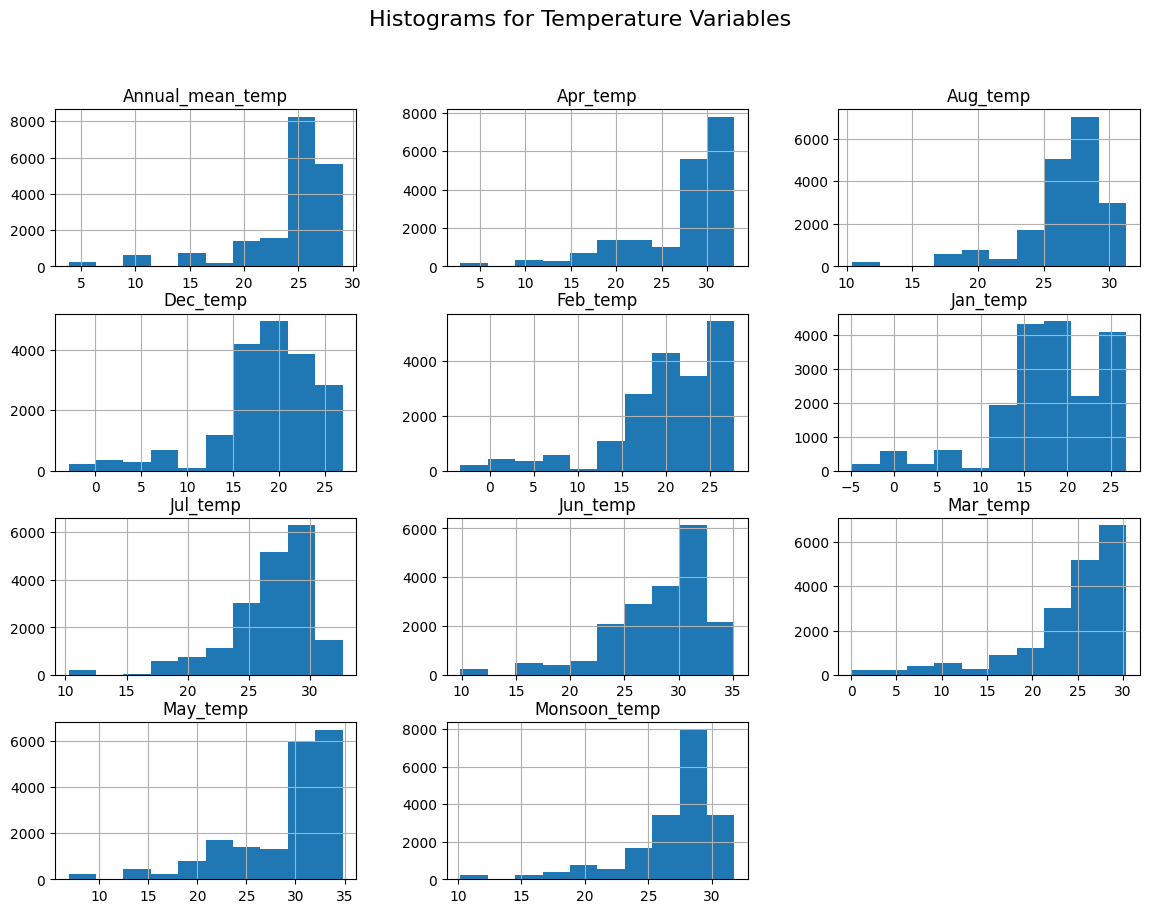

In [ ]:
temp_df.hist(figsize=(14,10))
plt.suptitle("Histograms for Temperature Variables", fontsize=16)
plt.show()

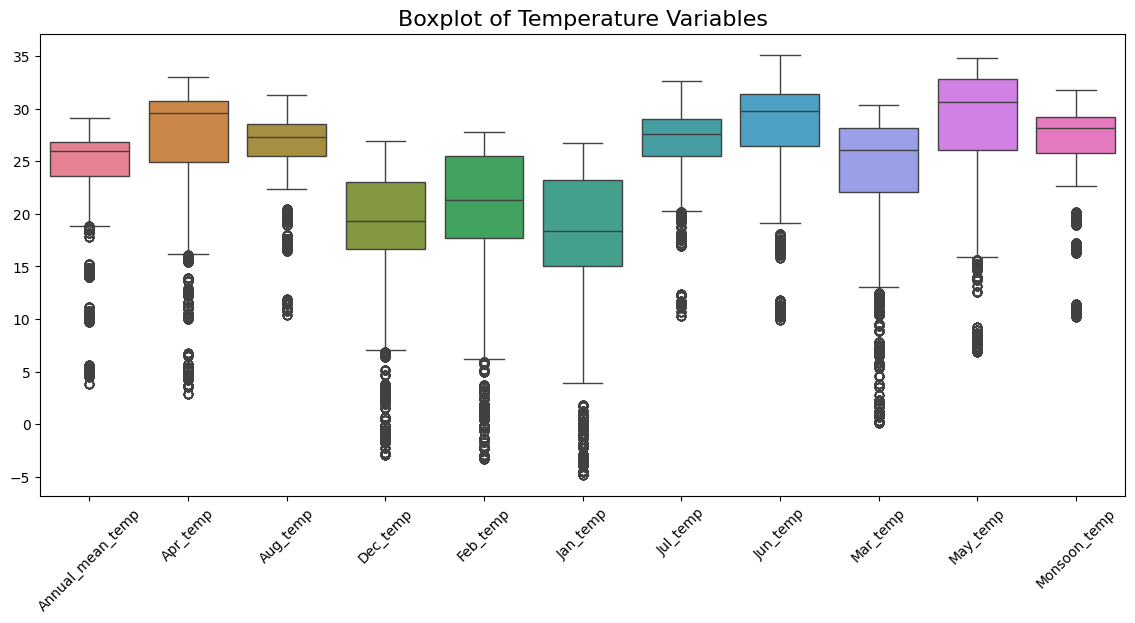

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=temp_df)
plt.title("Boxplot of Temperature Variables", fontsize=16)
plt.xticks(rotation=45)
plt.show()

#### **Insights**

Summary of Temperature Distributions:<br>
* Most temperature variables are unimodal and show clear seasonal patterns.<br>
* Summer and monsoon months (May, Jun, Jul, Aug, Monsoon, Annual_mean_temp) are left-skewed, with higher temperatures (20–30°C) dominating. <br>
* Winter months (Dec, Jan, Feb) are right-skewed, with most temperatures in the lower ranges (5–10°C) and a tail extending to higher values.<br>
* March is nearly symmetric around 10–15°C, and April is multimodal, indicating two different temperature peaks (10–15°C and 20–25°C).

Boxplot Summary
* Compared 11 temperature variables.<br>
* Feb_temp, Dec_temp, and May_temp show noticeable outliers.<br>
* Median differs across months (Annual_mean_temp ≈ 25°C, Apr_temp ≈ 30°C).<br>
* Monsoon_temp and Jul_temp have the smallest IQR → least temperature variation.

#### **Bivariate Analysis**

In [ ]:
corr_matrix = temp_df.corr()
corr_matrix

,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp
Annual_mean_temp,1.00000,0.97139,0.88758,0.92459,0.94300,0.91398,0.88242,0.87331,0.97567,0.92910,0.90870
Apr_temp,0.97139,1.00000,0.84693,0.85510,0.89352,0.85151,0.85808,0.89615,0.95405,0.96577,0.89107
Aug_temp,0.88758,0.84693,1.00000,0.69412,0.71353,0.66846,0.98312,0.92951,0.78987,0.86598,0.98707
Dec_temp,0.92459,0.85510,0.69412,1.00000,0.97942,0.98592,0.67449,0.63769,0.94937,0.75327,0.70253
Feb_temp,0.94300,0.89352,0.71353,0.97942,1.00000,0.98560,0.69438,0.68259,0.96997,0.79858,0.72986
Jan_temp,0.91398,0.85151,0.66846,0.98592,0.98560,1.00000,0.64604,0.61960,0.94533,0.74120,0.67798
Jul_temp,0.88242,0.85808,0.98312,0.67449,0.69438,0.64604,1.00000,0.95530,0.78116,0.89242,0.99246
Jun_temp,0.87331,0.89615,0.92951,0.63769,0.68259,0.61960,0.95530,1.00000,0.78312,0.95036,0.97242
Mar_temp,0.97567,0.95405,0.78987,0.94937,0.96997,0.94533,0.78116,0.78312,1.00000,0.88161,0.81511
May_temp,0.92910,0.96577,0.86598,0.75327,0.79858,0.74120,0.89242,0.95036,0.88161,1.00000,0.92100


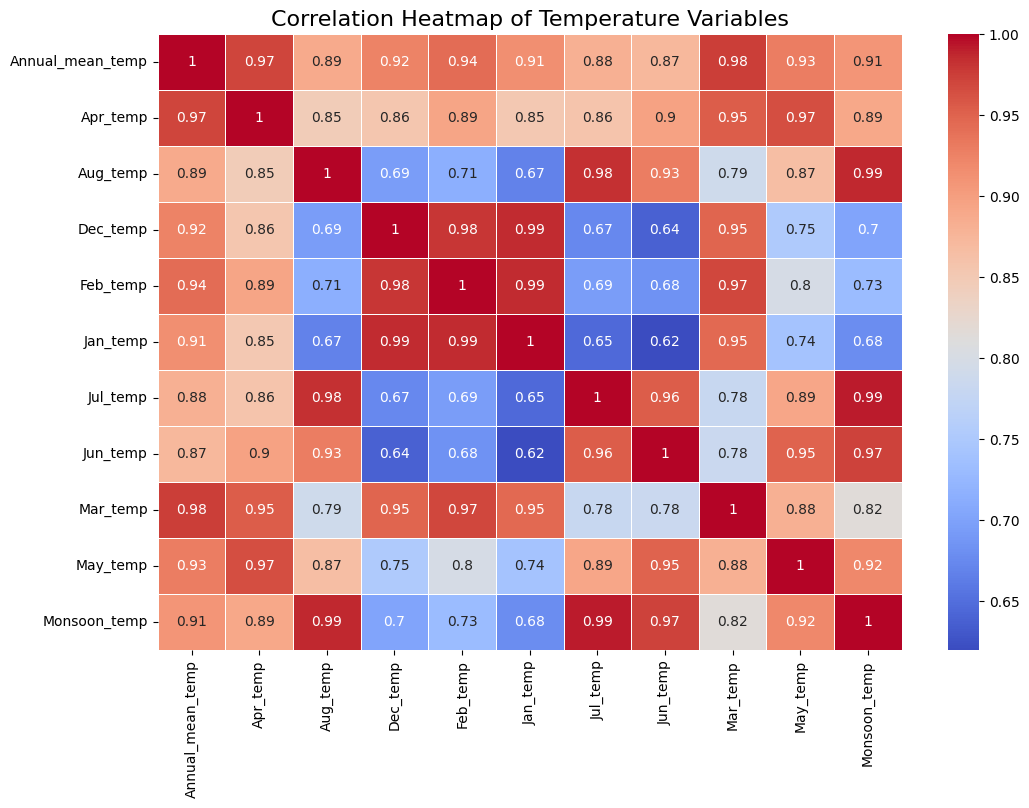

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Temperature Variables", fontsize=16)
plt.show()


===== BIVARIATE ANALYSIS: Annual_mean_temp vs Yield =====
Correlation (Annual_mean_temp vs Yield): 0.04918092911852643


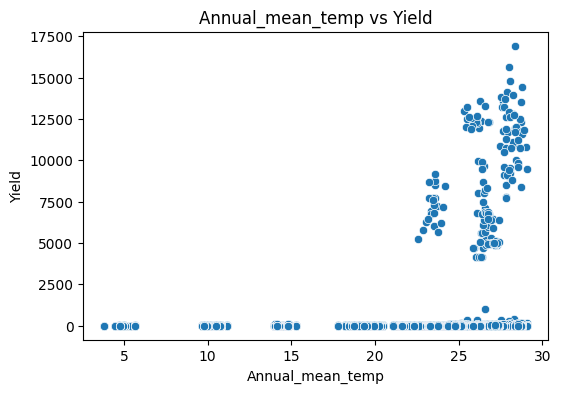


===== BIVARIATE ANALYSIS: Apr_temp vs Yield =====
Correlation (Apr_temp vs Yield): 0.03474496406017976


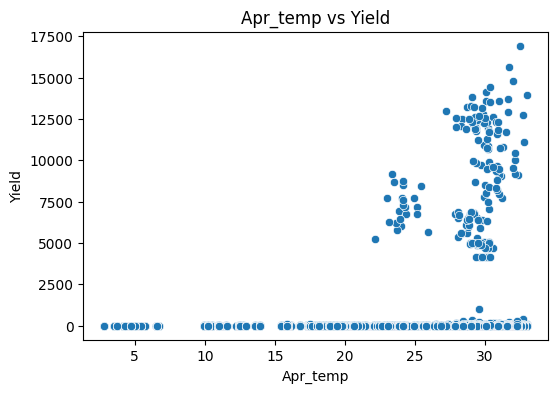


===== BIVARIATE ANALYSIS: Aug_temp vs Yield =====
Correlation (Aug_temp vs Yield): 0.03482349962726552


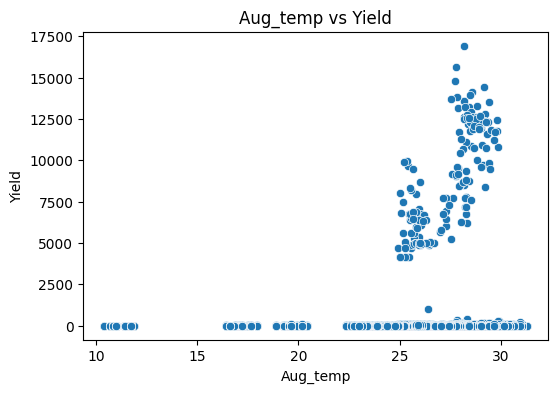


===== BIVARIATE ANALYSIS: Dec_temp vs Yield =====
Correlation (Dec_temp vs Yield): 0.06951909940580649


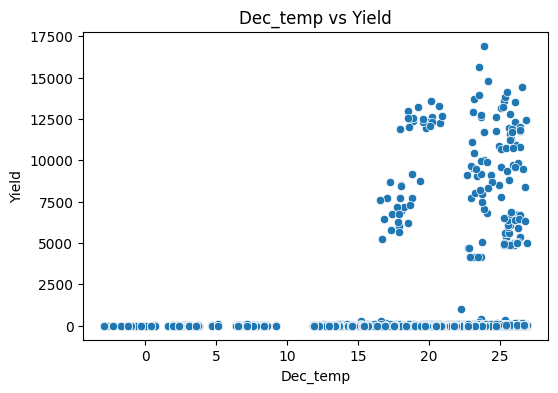


===== BIVARIATE ANALYSIS: Feb_temp vs Yield =====
Correlation (Feb_temp vs Yield): 0.06322783701587874


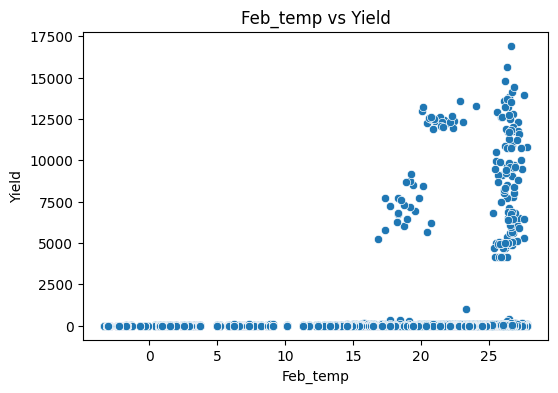


===== BIVARIATE ANALYSIS: Jan_temp vs Yield =====
Correlation (Jan_temp vs Yield): 0.07022315815457437


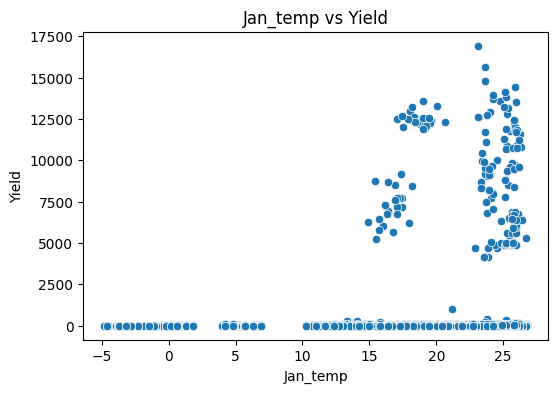


===== BIVARIATE ANALYSIS: Jul_temp vs Yield =====
Correlation (Jul_temp vs Yield): 0.030300237437823622


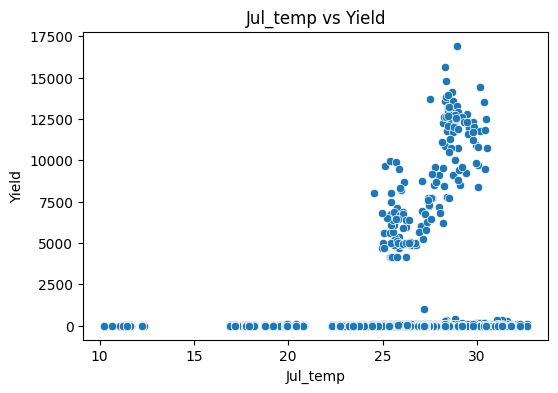


===== BIVARIATE ANALYSIS: Jun_temp vs Yield =====
Correlation (Jun_temp vs Yield): 0.015105790345081166


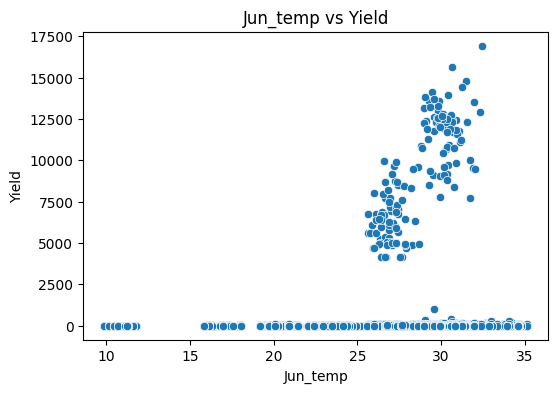


===== BIVARIATE ANALYSIS: Mar_temp vs Yield =====
Correlation (Mar_temp vs Yield): 0.051795340536443996


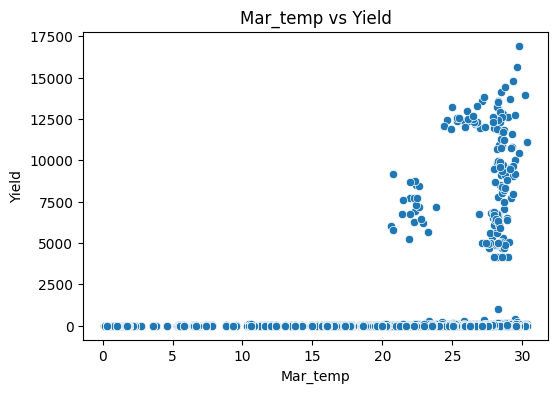


===== BIVARIATE ANALYSIS: May_temp vs Yield =====
Correlation (May_temp vs Yield): 0.02038742435871433


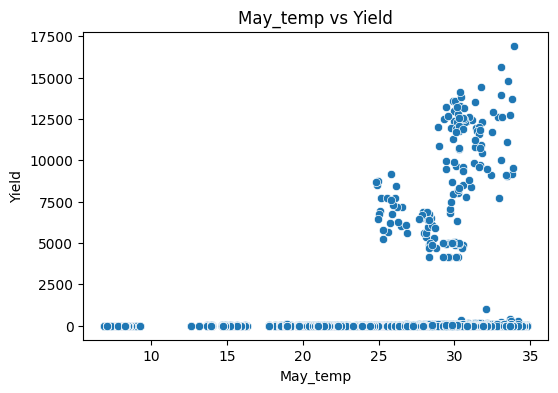


===== BIVARIATE ANALYSIS: Monsoon_temp vs Yield =====
Correlation (Monsoon_temp vs Yield): 0.02842244969146668


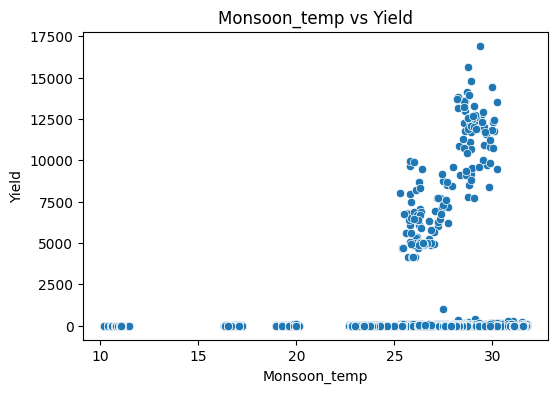

In [ ]:

temp_vars = [
    'Annual_mean_temp', 'Apr_temp', 'Aug_temp', 'Dec_temp', 'Feb_temp',
    'Jan_temp', 'Jul_temp', 'Jun_temp', 'Mar_temp', 'May_temp', 'Monsoon_temp'
]

# Loop for bivariate analysis between each temp variable and Yield
for var in temp_vars:
    print(f"\n===== BIVARIATE ANALYSIS: {var} vs Yield =====")

    # Correlation
    corr = yield_df[var].corr(yield_df['Yield'])
    print(f"Correlation ({var} vs Yield): {corr}")

    # Scatter plot
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=yield_df[var], y=yield_df['Yield'])
    plt.title(f"{var} vs Yield")
    plt.xlabel(var)
    plt.ylabel("Yield")
    plt.show()


#### **Insights**

Correlation Summary

* Annual_mean_temp strongly correlates with all months → yearly mean temp follows monthly patterns.
* Mar–Apr–May are highly linked → smooth rise into summer.
* Jun–Jul–Aug show very high correlation → stable summer temperatures.
* Dec–Jan–Feb move almost identically → consistent winter pattern.
* Monsoon_temp strongly ties with summer → influenced by pre-monsoon heat.
* Lowest correlations occur between opposite seasons (summer vs winter).
* **Annual mean temp" shows a strong positive correlation (values near 0.9 or 1) with almost all monthly temperatures**
* "Dec temp" and "Jan temp" are also very strongly correlated with each other (0.99).
* The correlation between "Aug temp" and "Jan temp" is 0.71, which is lower than many other pairings.
* This suggests that while all temperatures are related, some monthly temperatures are more closely linked than others.



* The correlation between Annual_mean_temp and crop yield is 0.049. This is a very weak positive correlation, very close to zero.<br>
**In simple words: Annual average temperature does NOT influence crop yield in this dataset.**
* The correlation between Apr_temp and crop yield is 0.0347. This is also an extremely weak positive correlation, almost zero.
* The correlation between Aug_temp and crop yield is 0.0348.<br>
**Simple conclusion: April and August mean temperature does NOT influence crop yield in this dataset.**
* The correlation between Dec_temp and crop yield is 0.0695.
* The correlation between Feb_temp and crop yield is 0.0632. This is a very weak positive correlation, close to zero.
* The correlation between Jan_temp and crop yield is 0.0702.
**Simple conclusion: December, February and January mean temperature features does NOT influence crop yield in this dataset.**

### Bookmark3-Sneha

**Analyzing Features** -

Nov_temp, Oct_temp, Post_Monsoon_temp, Sep_temp,
              Summer_temp, Winter_temp, JAN_rain, FEB_rain,
              MAR_rain, APR_rain, MAY_rain

In [7]:
feature_columns = ['Sep_temp', 'Oct_temp', 'Nov_temp',  'Post_Monsoon_temp',
              'Summer_temp', 'Winter_temp', 'JAN_rain', 'FEB_rain',
              'MAR_rain', 'APR_rain', 'MAY_rain']

Target = 'Yield'

In [8]:
feature_df = yield_df[feature_columns]
feature_df.head()

,Sep_temp,Oct_temp,Nov_temp,Post_Monsoon_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain
0,26.02000,23.88000,21.11000,20.55000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000
1,26.02000,23.88000,21.11000,20.55000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000
2,26.02000,23.88000,21.11000,20.55000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000
3,26.02000,23.88000,21.11000,20.55000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000
4,26.02000,23.88000,21.11000,20.55000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000


In [ ]:
feature_df.isnull().sum()

,0
Sep_temp,1028
Oct_temp,1028
Nov_temp,1028
Post_Monsoon_temp,1028
Summer_temp,1028
Winter_temp,1028
JAN_rain,2766
FEB_rain,2766
MAR_rain,2766
APR_rain,2766


In [ ]:
feature_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sep_temp,18661.00000,26.26995,3.72570,8.67000,25.57000,27.45000,28.57000,30.68000
Oct_temp,18661.00000,24.96025,4.34958,3.61000,25.21000,26.43000,27.21000,29.93000
Nov_temp,18661.00000,21.77050,5.00576,0.45000,20.81000,22.95000,24.88000,27.86000
Post_Monsoon_temp,18661.00000,21.82616,4.89522,0.60000,20.88000,22.91000,24.92000,27.74000
Summer_temp,18661.00000,26.69166,5.52986,3.70000,24.40000,28.99000,30.07000,32.21000
Winter_temp,18661.00000,19.04467,6.29160,-3.88000,16.49000,19.85000,24.52000,27.27000
JAN_rain,16923.00000,18.02406,30.60507,0.00000,1.50000,7.90000,22.70000,296.00000
FEB_rain,16923.00000,25.93796,39.51839,0.00000,2.25000,11.50000,32.80000,403.50000
MAR_rain,16923.00000,42.87695,54.36091,0.00000,5.00000,23.50000,58.90000,379.50000
APR_rain,16923.00000,76.90429,86.54673,0.00000,10.30000,41.60000,116.00000,466.90000


#### **Univariate Analysis**

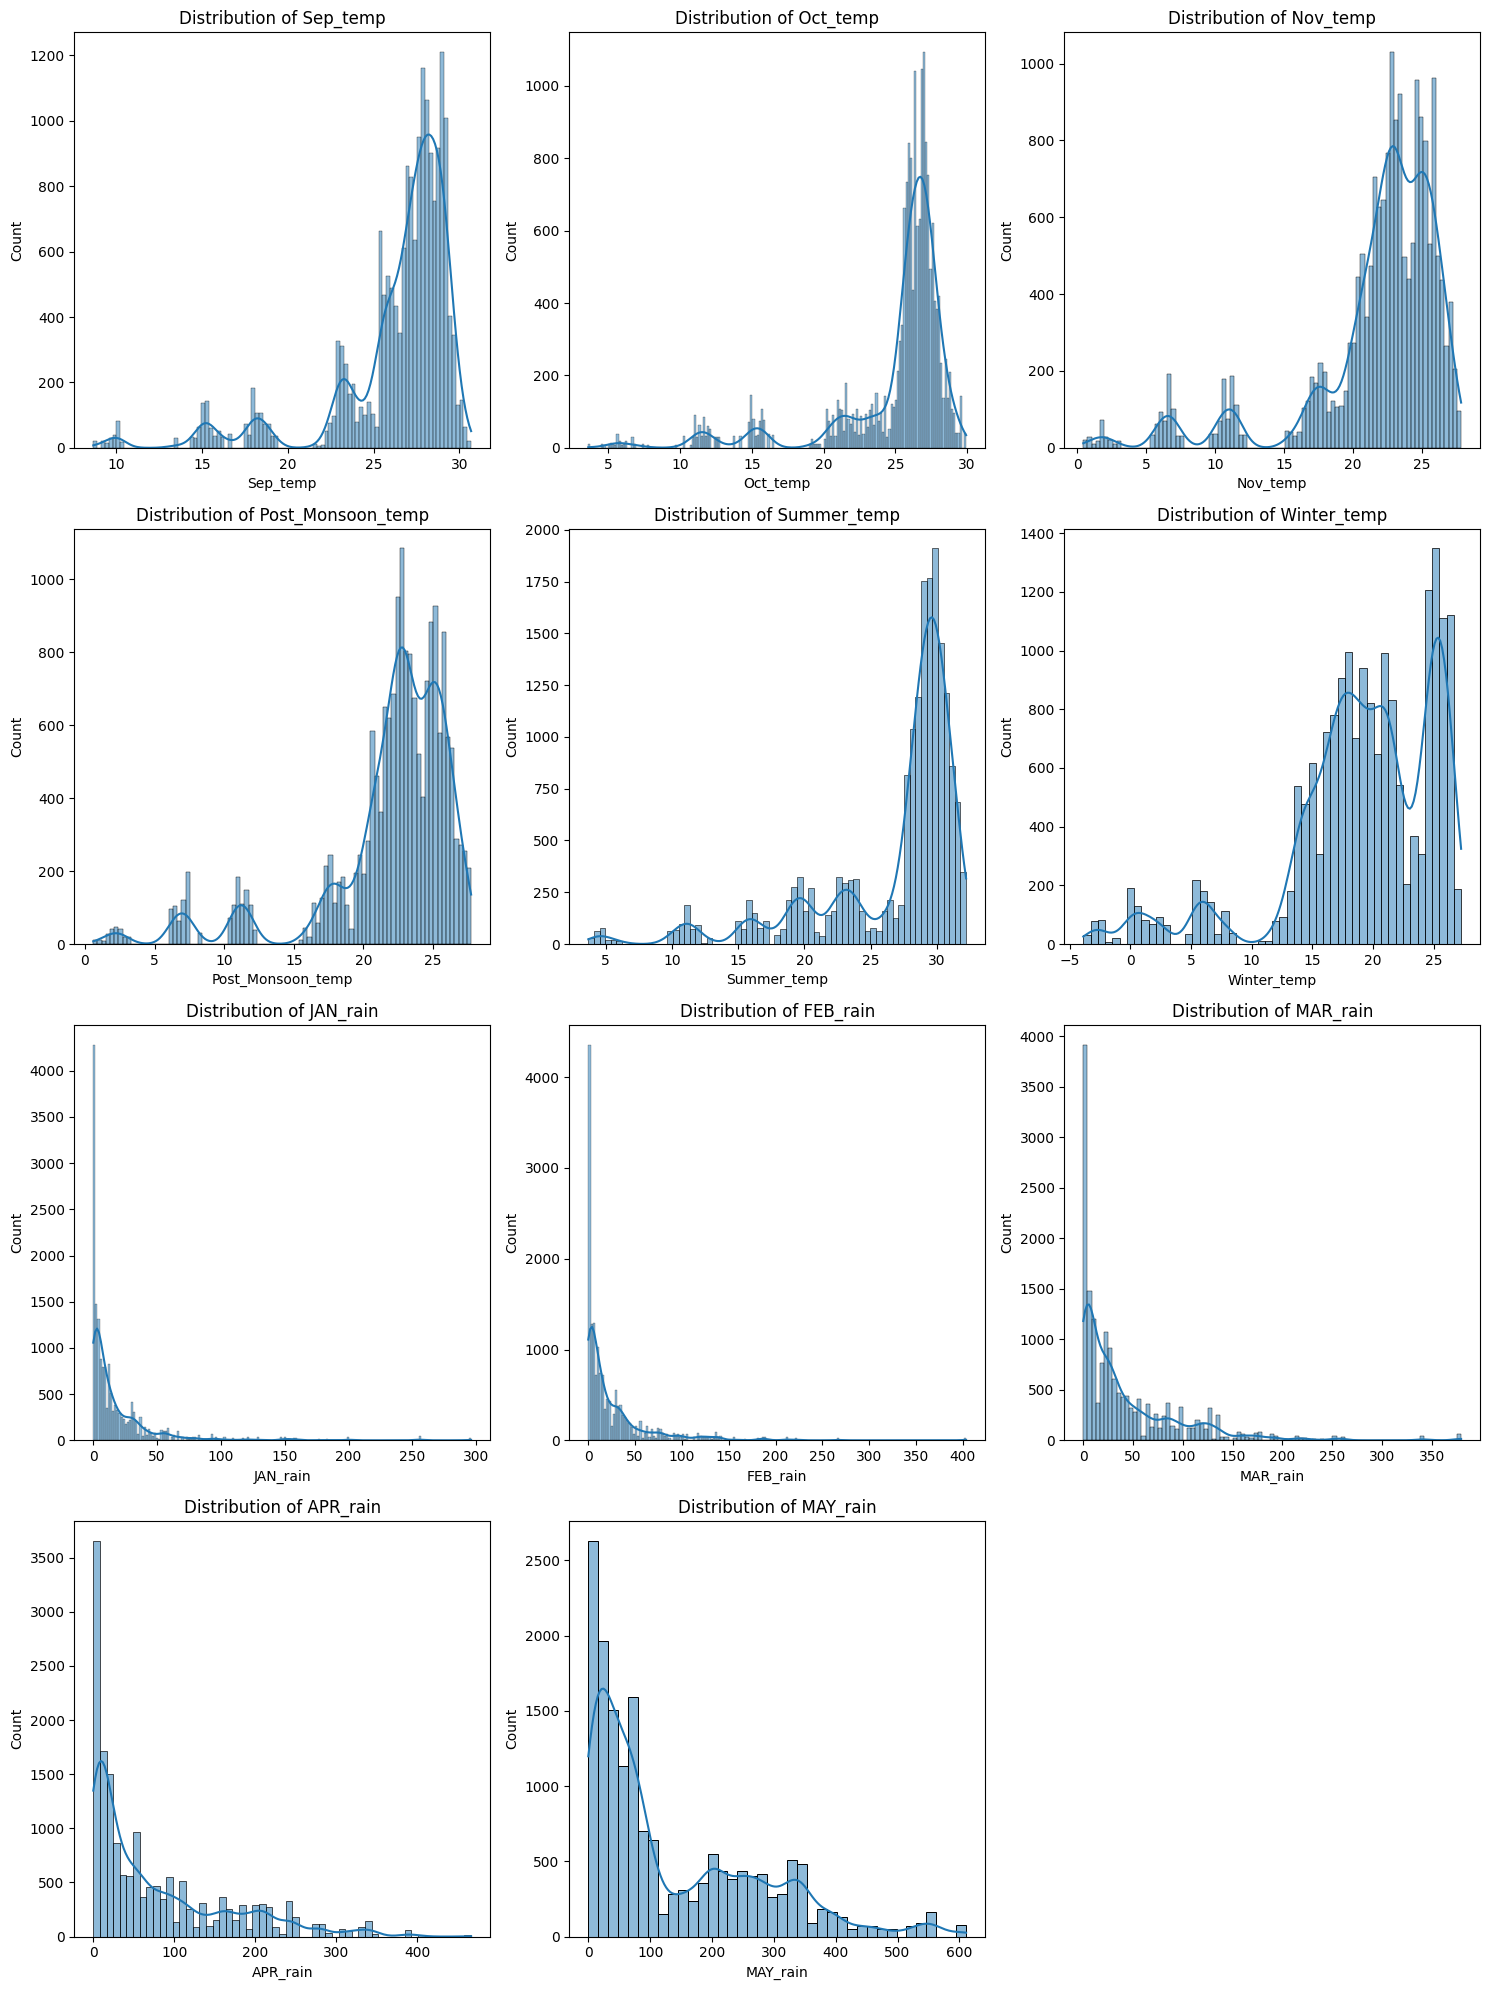

In [ ]:
n_cols = 3

n_rows = (len(feature_df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))

for i, col in enumerate(feature_df.columns,1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(feature_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()

plt.show()

In [ ]:
for feat in feature_df:
    print(feat, feature_df[feat].skew())

Sep_temp -2.248554731166241
Oct_temp -2.40053648445641
Nov_temp -1.9894517762228883
Post_Monsoon_temp -2.0017837807775023
Summer_temp -1.823883558198971
Winter_temp -1.345070617985792
JAN_rain 4.285079437362646
FEB_rain 3.3859034789011084
MAR_rain 2.3668626282624188
APR_rain 1.3525990234384708
MAY_rain 1.113418552324847


In [ ]:
def detect_outliers(col):
    Q1 = feature_df[col].quantile(0.25)
    Q3 = feature_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = feature_df[(feature_df[col] < lower) | (feature_df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

num_cols = feature_df.columns

for col in num_cols:
    detect_outliers(col)

Sep_temp: 1606 outliers
Oct_temp: 2897 outliers
Nov_temp: 1606 outliers
Post_Monsoon_temp: 1606 outliers
Summer_temp: 1238 outliers
Winter_temp: 842 outliers
JAN_rain: 1257 outliers
FEB_rain: 1432 outliers
MAR_rain: 818 outliers
APR_rain: 728 outliers
MAY_rain: 245 outliers


#### **Insights**

**Temperature Columns** (Sep, Oct, Nov, Summer, Winter, Post-Monsoon Temps)
* All temperature features are negatively skewed, meaning most temperature values are on the higher side.
* This matches typical Indian climate ranges (around 24°C to 32°C).
* Only a small number of records show cooler temperatures — likely from hilly or North-East regions.
* So overall, temperatures are generally warm with few unusually low values.

**Rainfall Columns** (JAN–MAY Rainfall)
* Rainfall features show positive (right) skewness, meaning rainfall is usually low, but there are some months with extremely high rainfall.
* Most locations receive very little rainfall in these months.
* A few entries represent heavy rainfall events, causing the long tail on the right.
* This is normal because rainfall is seasonal and uneven, unlike temperature.


In [ ]:
temp_cols = ['Sep_temp','Oct_temp','Nov_temp','Post_Monsoon_temp',
             'Summer_temp','Winter_temp']
state_temp_mean = yield_df.groupby('State')[temp_cols].mean()

state_temp_mean.sort_values('Winter_temp').head(10)

,Sep_temp,Oct_temp,Nov_temp,Post_Monsoon_temp,Summer_temp,Winter_temp
State,,,,,,
Sikkim,9.80004,5.85863,1.75389,2.12186,4.76726,-2.52708
Himachal Pradesh,15.19456,11.56170,6.56682,6.96002,11.12956,1.14838
Uttarakhand,18.21726,15.30079,10.98777,11.24124,16.06370,6.31314
Arunachal Pradesh,23.09301,20.43247,16.24325,16.52048,18.80445,12.68757
Nagaland,23.17808,21.20483,17.39483,17.65687,19.56096,13.99827
Manipur,23.12374,21.78457,18.20736,18.42255,20.49158,14.68419
Punjab,29.48048,26.05325,19.83169,20.21675,27.31768,14.80970
Haryana,29.38469,26.65640,20.98667,21.16762,28.39106,15.76585
Delhi,29.48552,26.87389,21.39094,21.46507,28.70414,16.02251


#### **Bivariate Analysis**

In [9]:
feature_df.loc[:, 'Yield'] = yield_df['Yield']

feature_df.corr()


,Sep_temp,Oct_temp,Nov_temp,Post_Monsoon_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,Yield
Sep_temp,1.00000,0.96458,0.87754,0.88084,0.90281,0.76650,-0.36668,-0.41597,-0.28750,-0.18868,-0.13299,0.03498
Oct_temp,0.96458,1.00000,0.95785,0.96051,0.94349,0.87115,-0.42076,-0.44841,-0.27762,-0.16828,-0.08080,0.04254
Nov_temp,0.87754,0.95785,1.00000,0.99686,0.93233,0.96166,-0.44582,-0.47639,-0.25610,-0.12161,-0.01906,0.05846
Post_Monsoon_temp,0.88084,0.96051,0.99686,1.00000,0.93464,0.96619,-0.44200,-0.48149,-0.26155,-0.12513,-0.02272,0.05934
Summer_temp,0.90281,0.94349,0.93233,0.93464,1.00000,0.89229,-0.37477,-0.45183,-0.37900,-0.32441,-0.21213,0.03689
Winter_temp,0.76650,0.87115,0.96166,0.96619,0.89229,1.00000,-0.44390,-0.48240,-0.25188,-0.10873,0.02340,0.06697
JAN_rain,-0.36668,-0.42076,-0.44582,-0.44200,-0.37477,-0.44390,1.00000,0.50227,0.24172,0.06183,-0.12349,-0.01548
FEB_rain,-0.41597,-0.44841,-0.47639,-0.48149,-0.45183,-0.48240,0.50227,1.00000,0.43877,0.09868,-0.03167,-0.01110
MAR_rain,-0.28750,-0.27762,-0.25610,-0.26155,-0.37900,-0.25188,0.24172,0.43877,1.00000,0.42592,0.29230,0.01480
APR_rain,-0.18868,-0.16828,-0.12161,-0.12513,-0.32441,-0.10873,0.06183,0.09868,0.42592,1.00000,0.62777,0.03419


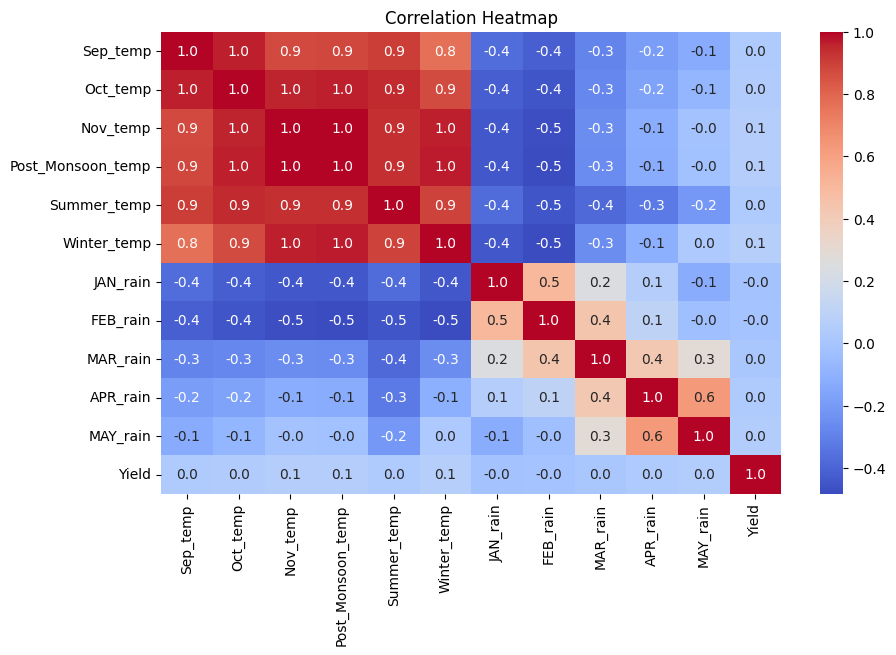

In [ ]:
feature_df.loc[:, 'Yield'] = yield_df['Yield']
# feature_df.head()
plt.figure(figsize=(10, 6))
sns.heatmap(feature_df.corr(), annot= True, cmap= 'coolwarm', fmt= '.1f')
plt.title('Correlation Heatmap')
plt.show()

here


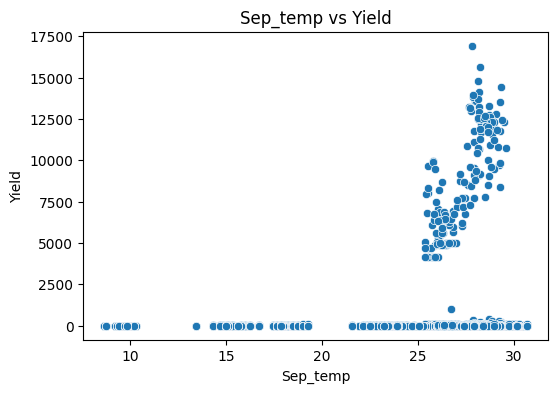

here


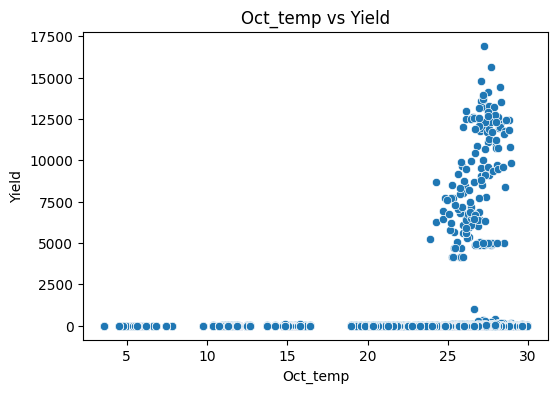

here


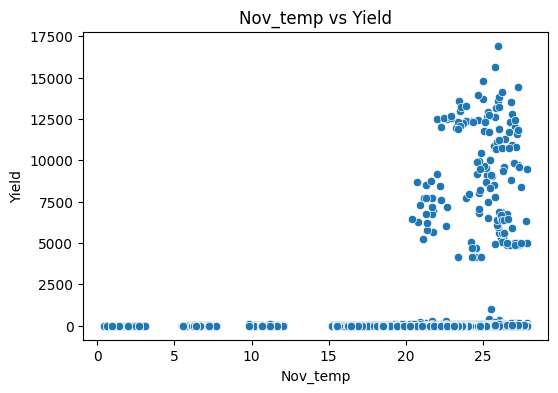

here


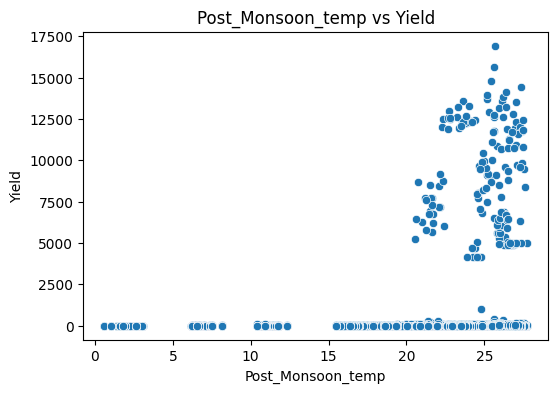

here


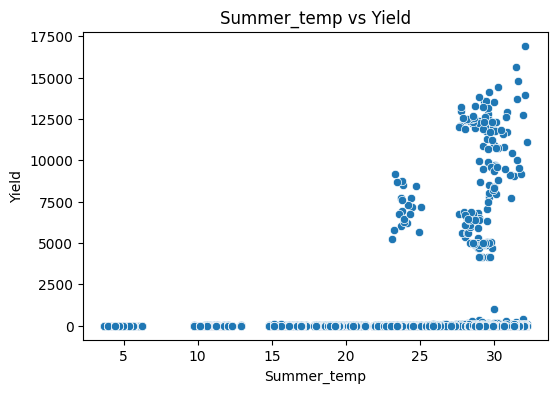

here


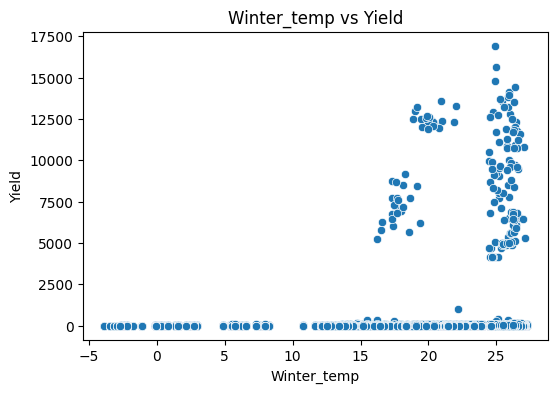

In [ ]:
feature_df.head()
for col in ["Sep_temp", "Oct_temp", "Nov_temp", "Post_Monsoon_temp", "Summer_temp", "Winter_temp"]:
    print("here")
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=feature_df[col], y=feature_df['Yield'])
    plt.title(f"{col} vs Yield")
    plt.xlabel(col)
    plt.ylabel("Yield")
    plt.show()

In [ ]:
correlations = feature_df.corrwith(yield_df['Yield']).sort_values(ascending=True)
correlations

,0
JAN_rain,-0.01548
FEB_rain,-0.01110
MAR_rain,0.01480
APR_rain,0.03419
Sep_temp,0.03498
Summer_temp,0.03689
Oct_temp,0.04254
MAY_rain,0.04577
Nov_temp,0.05846
Post_Monsoon_temp,0.05934


In [ ]:
cols = [
    'Post_Monsoon_temp','Summer_temp',
    'Winter_temp'
]

# df[cols].isna().sum()

yield_df[cols].isna().mean() * 100

,0
Post_Monsoon_temp,5.22119
Summer_temp,5.22119
Winter_temp,5.22119


In [10]:

feature_df.loc[:,'State'] = yield_df['State']

feature_df[yield_df[['Post_Monsoon_temp','Summer_temp','Winter_temp']].isna().all(axis=1)]
missing_states = feature_df[
    feature_df[['Post_Monsoon_temp', 'Summer_temp', 'Winter_temp']].isna().all(axis=1)
]['State'].unique()

missing_states

array(['Jammu and Kashmir', 'Telangana'], dtype=object)

Insights

**Temperatures** (Sep, Oct, Nov, Summer, Winter, Post-Monsoon Temps)
* All temperature features are highly correlated with each other → they move together and capture similar climate information.
* They show a small positive correlation with Yield, meaning:
    * Slightly warmer post-monsoon temperatures can be linked to slightly higher yields.
    * But this relationship is very weak and not reliable on its own.

**Rainfall** (JAN–MAY)
* Rainfall features show near-zero correlation with Yield.
* This suggests:
    * Rainfall in these months does not influence crop productivity in your dataset.
    * These months likely fall outside the main crop-growing season, so their impact on yield is minimal.

**Temperature vs Rainfall**
* These two groups show negative correlation:
    * Hot regions tend to receive less rainfall.
    * Cooler regions tend to receive more rainfall.
* This reflects normal seasonal and regional climate patterns.

**Yield**
* Yield shows almost no strong correlation with any of the 11 features.
* This indicates:
    * *No single* weather variable can predict yield accurately.
    * If we try to use monthly temperatures, we would ideally need all 12 months for proper coverage — but adding so many features increases complexity and redundancy.
    * Seasonal aggregated temperatures (Summer, Winter, Post-Monsoon) also show strong multicollinearity, so they are not ideal individually.
    * *Temperature may still have a small logical* influence on yield, and you can use a combined measure like the mean seasonal temperature if needed.
    * Overall, yield is driven more by other agricultural factors


### Bookmark4-Ashir

In [ ]:
#List rainfall columns
rain_cols = [
    'JUN_rain','JUL_rain','AUG_rain','SEP_rain','OCT_rain','NOV_rain','DEC_rain',
    'Jan-Feb_rain','Mar-May_rain','Jun-Sep_rain','Oct-Dec_rain'
]

target="Yield"

df_selected = yield_df[rain_cols + [target]]
df_selected.head()

,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain,Yield
0,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000,0.79609
1,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000,0.71043
2,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000,0.23833
3,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000,5238.05174
4,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000,0.42091


#### **Univariate Analysis**

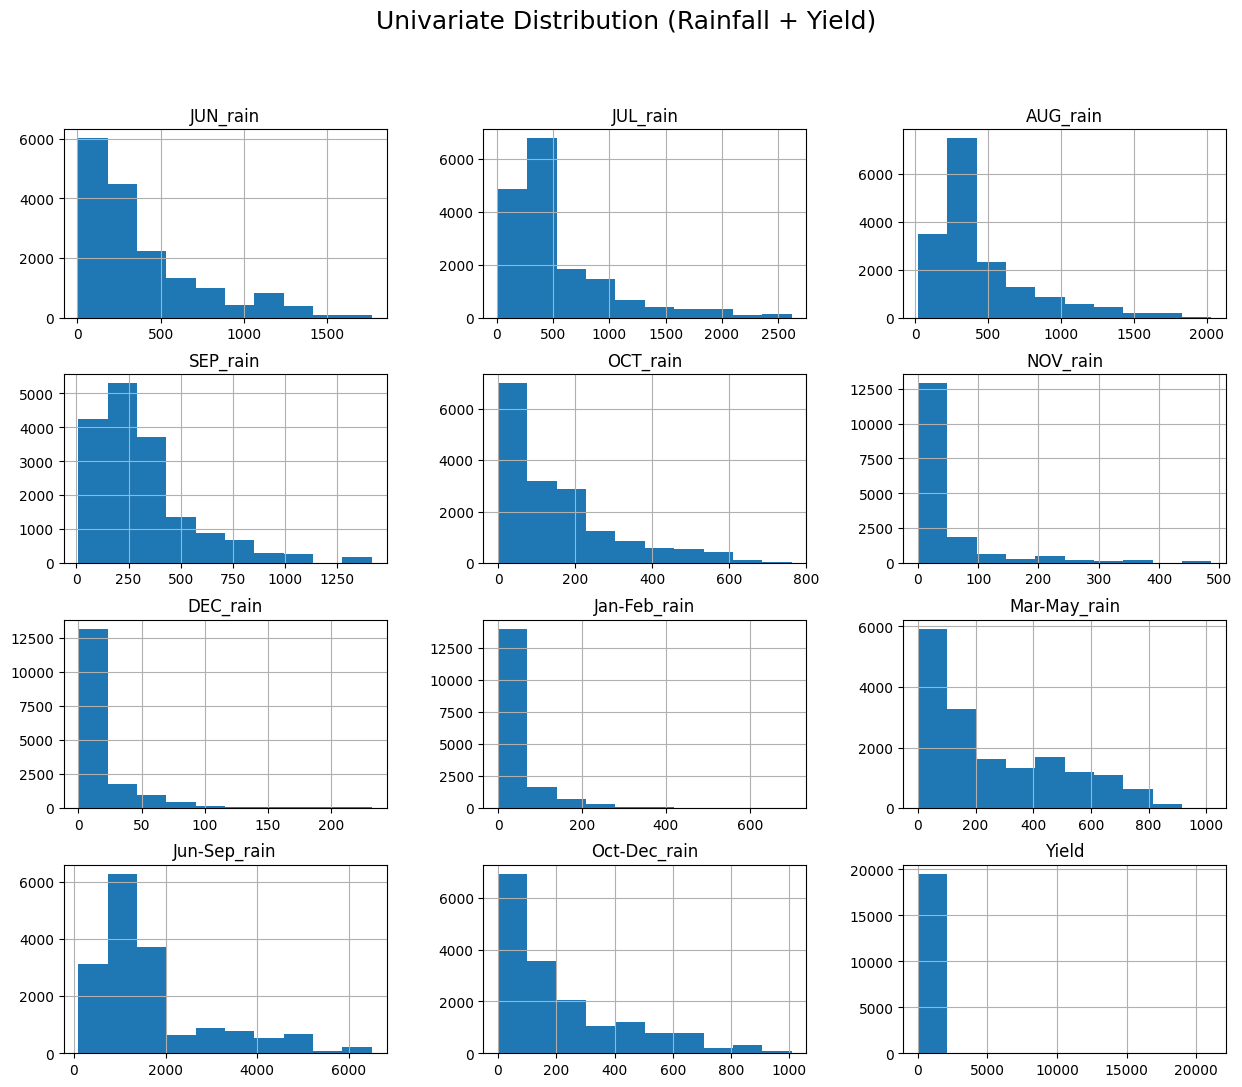

In [ ]:
#histograms
df_selected.hist(figsize=(15, 12))
plt.suptitle("Univariate Distribution (Rainfall + Yield)", fontsize=18)
plt.show()

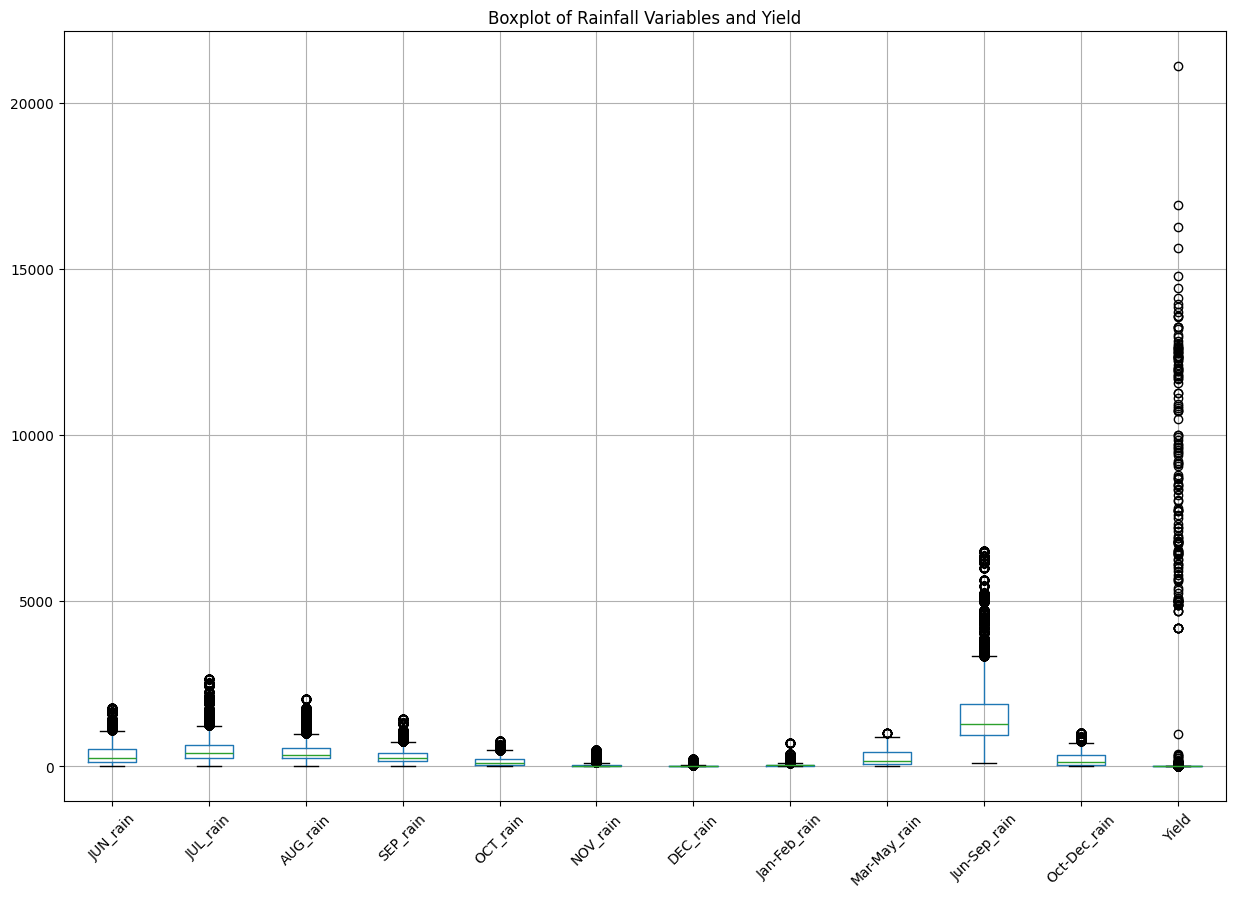

In [ ]:
#boxplots
plt.figure(figsize=(15, 10))
df_selected.boxplot()
plt.title("Boxplot of Rainfall Variables and Yield")
plt.xticks(rotation=45)
plt.show()

#### **Insights**

Dataset Structure
The dataset contains rainfall columns + the target column Yield.<br>

Rainfall values are a combination of:<br>
.Monthly rainfall<br>
.Seasonal rainfall groups<br>

This automatically creates high correlation between many columns because:<br>
Seasonal rainfall = sum of multiple months.<br>
Example: Jun-Sep_rain ≈ JUN + JUL + AUG + SEP.<br>

Including both monthly and seasonal rainfall will cause multicollinearity


---


Rainfall Features:
* Most rainfall features show right-skewed distributions.

Yield:

* Highly positively skewed.
* Only a few records have very high yields.

This suggests:
* Perform log transform for modeling.


---


* Yield also shows outliers, representing high productivity regions.
* Rainfall columns contain many outliers, common in climate data.
* Boxplots confirm high variability across States and seasons.

#### **Bivariate Analysis**

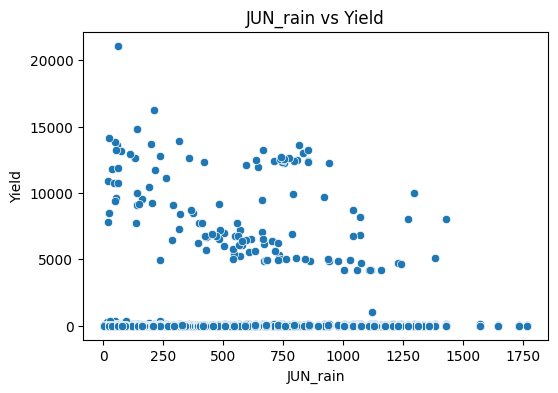

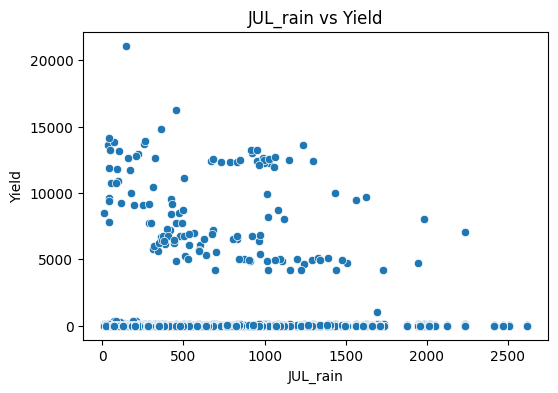

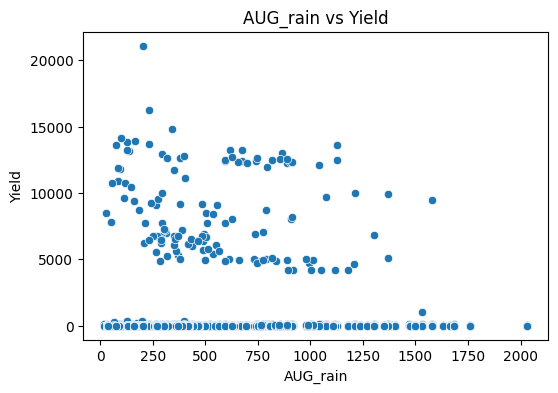

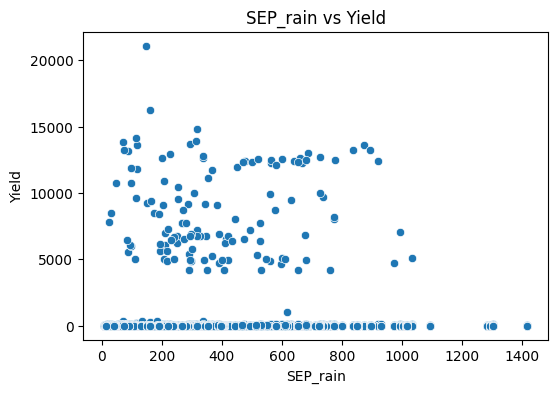

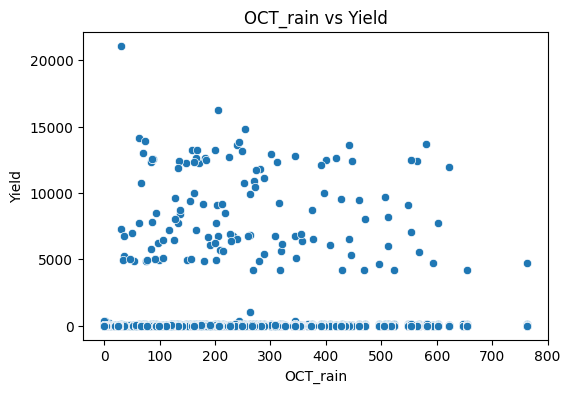

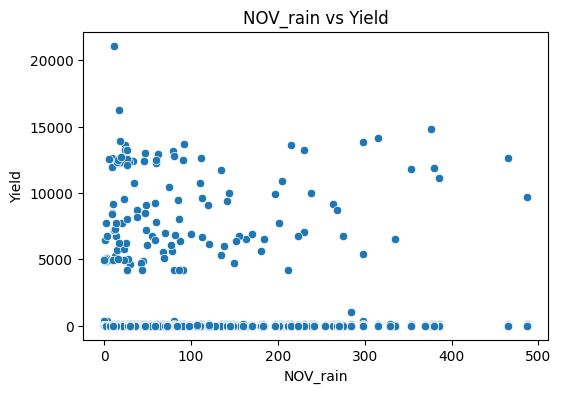

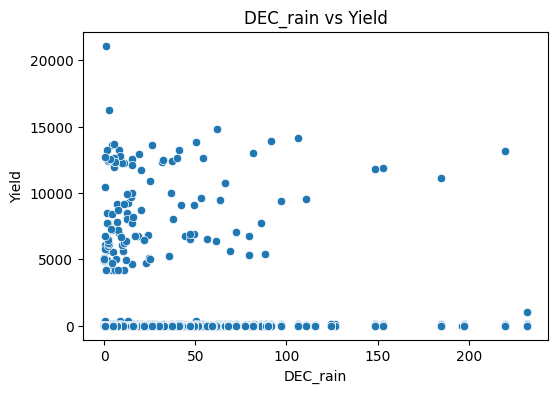

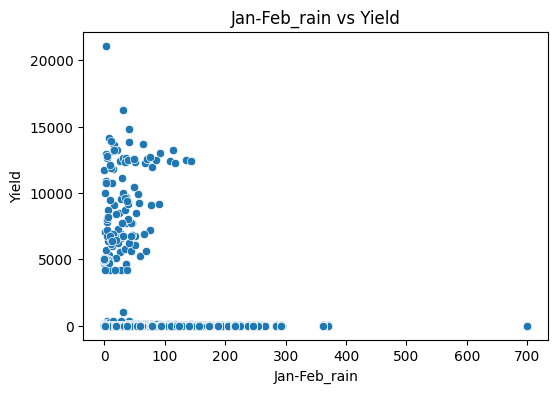

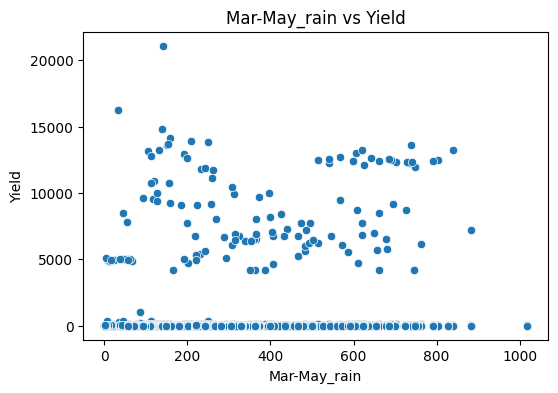

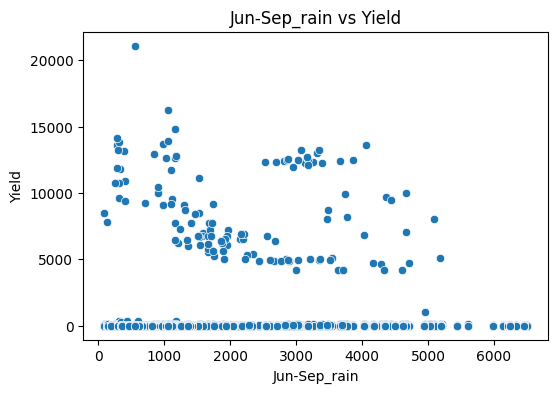

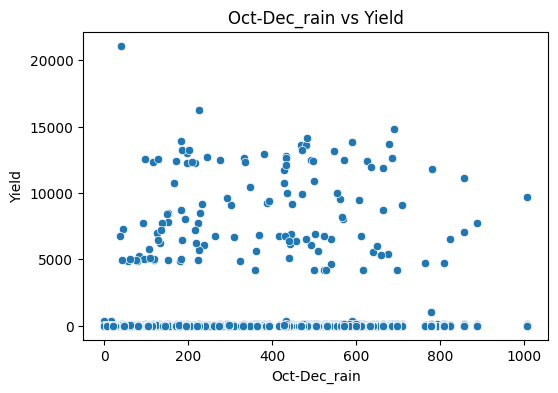

In [ ]:
#Scatter Plots
for col in rain_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df_selected, x=col, y=target)
    plt.title(f"{col} vs Yield")
    plt.show()

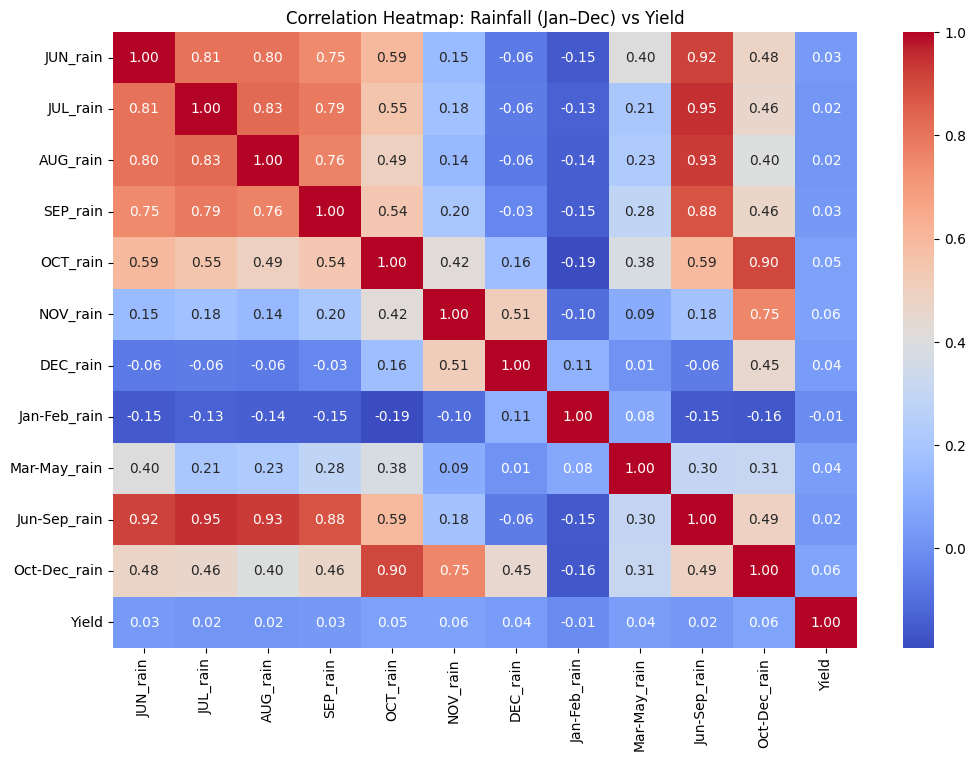

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Rainfall (Jan–Dec) vs Yield")
plt.show()

In [ ]:
#High correlation with yield
correlations = df_selected.corr()[target].sort_values(ascending=False)
correlations

,Yield
Yield,1.00000
Oct-Dec_rain,0.06456
NOV_rain,0.05525
OCT_rain,0.05351
Mar-May_rain,0.04385
DEC_rain,0.03581
JUN_rain,0.03235
SEP_rain,0.02657
Jun-Sep_rain,0.02464
JUL_rain,0.01784


#### **Insights**

* Monthly rainfall shows very weak correlation with Yield.
* Most scatterplots look random, indicating:<br>
    Rain alone does not determine yield.
* Yield depends on: <br>
    temperature,irrigation,soil quality,fertilizers
* Jun-Sep_rain shows slightly more influence, because monsoon season matters most

---

Correlation

A. Rainfall vs Yield

* Jun-Sep_rain has the highest correlation with Yield (still weak).

* Monthly rainfall columns have very low correlation (0.0–0.15).

* Seasonal rainfall performs better than individual months.

B. Rainfall vs Rainfall (Multicollinearity)

You will see many correlations > 0.80 because:

* 1. Jun-Sep_rain is strongly correlated with JUN_rain,JUL_rain,AUG_rain,SEP_rain
* 2. Oct-Dec_rain highly correlates with OCT_rain,NOV_rain,DEC_rain
* 3. Monthly rainfall columns are also correlated with each other

---

Why this is a problem?

**This causes multicollinearity, which:
inflates model variance reduces model stability
makes feature importance unreliable.**


**Conclusion**

* Only 1 rainfall feature has any meaningful relationship with Yield.
* All others should be dropped because their correlation values with crop yield are almost zero.
* OCT-DEC Rainfall shows high relation.